<a href="https://colab.research.google.com/github/DayoungKwon/mrc/blob/main/mrc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from datasets import load_dataset
dataset = load_dataset("squad_kor_v1")

  0%|          | 0/2 [00:00<?, ?it/s]

### Dataset 살펴보기 
- train, valid, test 구성


In [ ]:
from pprint import pprint

print('train dataset 살펴보기 ----')
print(dataset['train'])
pprint(dataset['train'][0])

train dataset 살펴보기 ----
Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 60407
})
{'answers': {'answer_start': [54], 'text': ['교향곡']},
 'context': '1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로 해서 하나의 교향곡을 쓰려는 뜻을 '
            '갖는다. 이 시기 바그너는 1838년에 빛 독촉으로 산전수전을 다 걲은 상황이라 좌절과 실망에 가득했으며 '
            '메피스토펠레스를 만나는 파우스트의 심경에 공감했다고 한다. 또한 파리에서 아브네크의 지휘로 파리 음악원 관현악단이 '
            '연주하는 베토벤의 교향곡 9번을 듣고 깊은 감명을 받았는데, 이것이 이듬해 1월에 파우스트의 서곡으로 쓰여진 이 '
            '작품에 조금이라도 영향을 끼쳤으리라는 것은 의심할 여지가 없다. 여기의 라단조 조성의 경우에도 그의 전기에 적혀 있는 '
            '것처럼 단순한 정신적 피로나 실의가 반영된 것이 아니라 베토벤의 합창교향곡 조성의 영향을 받은 것을 볼 수 있다. '
            '그렇게 교향곡 작곡을 1839년부터 40년에 걸쳐 파리에서 착수했으나 1악장을 쓴 뒤에 중단했다. 또한 작품의 완성과 '
            '동시에 그는 이 서곡(1악장)을 파리 음악원의 연주회에서 연주할 파트보까지 준비하였으나, 실제로는 이루어지지는 '
            '않았다. 결국 초연은 4년 반이 지난 후에 드레스덴에서 연주되었고 재연도 이루어졌지만, 이후에 그대로 방치되고 '
            '말았다. 그 사이에 그는 리엔치와 방황하는 네덜란드인을 완성하고 탄호이저에도 착수하는 등 분주한 시간을 보냈는데, '
            '그런 바쁜 생활이 이 곡을 잊게 한 것이 아닌가

In [ ]:
answer_start = dataset['train'][0]['answers']['answer_start'][0]
print(dataset['train'][0]['context'][answer_start:answer_start+10])

교향곡을 쓰려는 뜻


### Baseline 살펴보기 
Konlpy: 파이썬 한국어 NLP 처리기  
Mecab-korean: 한국어 형태소 분석기  

https://www.kaggle.com/code/mynsng/korean-mrc-baseline-goorm-5

In [ ]:
! apt-get install -y openjdk-8-jdk python3-dev
! pip install konlpy "tweepy<4.0.0"
! /bin/bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-dev is already the newest version (3.6.7-1~18.04).
openjdk-8-jdk is already the newest version (8u342-b07-0ubuntu1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [90]:
train_sample = {
  "version": "Ko-MRC",
  "data": [
    {
      "title": "제주도 장마 시작 … 중부는 이달 말부터",
      "paragraphs": [
        {
          "context": "올여름 장마가 17일 제주도에서 시작됐다. 서울 등 중부지방은 예년보다 사나흘 정도 늦은 이달 말께 장마가 시작될 전망이다.17일 기상청에 따르면 제주도 남쪽 먼바다에 있는 장마전선의 영향으로 이날 제주도 산간 및 내륙지역에 호우주의보가 내려지면서 곳곳에 100㎜에 육박하는 많은 비가 내렸다. 제주의 장마는 평년보다 2~3일, 지난해보다는 하루 일찍 시작됐다. 장마는 고온다습한 북태평양 기단과 한랭 습윤한 오호츠크해 기단이 만나 형성되는 장마전선에서 내리는 비를 뜻한다.장마전선은 18일 제주도 먼 남쪽 해상으로 내려갔다가 20일께 다시 북상해 전남 남해안까지 영향을 줄 것으로 보인다. 이에 따라 20~21일 남부지방에도 예년보다 사흘 정도 장마가 일찍 찾아올 전망이다. 그러나 장마전선을 밀어올리는 북태평양 고기압 세력이 약해 서울 등 중부지방은 평년보다 사나흘가량 늦은 이달 말부터 장마가 시작될 것이라는 게 기상청의 설명이다. 장마전선은 이후 한 달가량 한반도 중남부를 오르내리며 곳곳에 비를 뿌릴 전망이다. 최근 30년간 평균치에 따르면 중부지방의 장마 시작일은 6월24~25일이었으며 장마기간은 32일, 강수일수는 17.2일이었다.기상청은 올해 장마기간의 평균 강수량이 350~400㎜로 평년과 비슷하거나 적을 것으로 내다봤다. 브라질 월드컵 한국과 러시아의 경기가 열리는 18일 오전 서울은 대체로 구름이 많이 끼지만 비는 오지 않을 것으로 예상돼 거리 응원에는 지장이 없을 전망이다.",
          "qas": [
            {
              "question": "북태평양 기단과 오호츠크해 기단이 만나 국내에 머무르는 기간은?",
              "answers": [
                {
                  "text": "한 달가량",
                  "answer_start": 478
                },
                {
                  "text": "한 달",
                  "answer_start": 478
                }
              ],
              "guid": "798db07f0b9046759deed9d4a35ce31e"
            }
          ]
        }
      ],
      "news_category": "종합",
      "source": "hankyung"
    },
    {
      "title": "부산정보산업진흥원, 과기부 지역SW서비스사업화 지원사업 4개 과제 선정",
      "paragraphs": [
        {
          "context": "부산시와 (재)부산정보산업진흥원(원장 이인숙)이 ‘2020~2021년 지역SW서비스사업화 지원사업’ 공모사업에 4개 과제가 선정되어 본격적인 사업 착수에 나선다. 과학기술정보통신부가 주관하는 ‘지역SW서비스사업화 지원사업’은 강소SW기업 및 초기 스타트업의 SW서비스 사업화 지원과 신시장 진출 지원을 통해 기업 경쟁력 강화와 지역경제 활성화를 도모하는 사업이다. 올해부터 2개년으로 진행되며, 국비와 시비, 민자 등 2년간 약 37억원의 예산이 투입된다. 앞서 진흥원은 부산의 미래 먹거리산업인 스마트해양, 지능형기계, 지능정보서비스 분야로 사전 수요조사를 진행했고, 평가를 통해 선정된 5개 과제를 공모사업에 신청했다. 그 결과 부산의 4개 과제가 최종 선정되는 쾌거를 거뒀다. 당 사업은 전국 진흥기관을 대상으로 공모를 시작해, 총 17개 지역에서 42개 과제가 선정되었으며, 4개 과제가 선정된 곳은 부산과 강원지역 뿐이다. 금번 선정된 과제들은 ‘인공지능융합센서와 서보 이송 로봇을 이용한 전단보강재의 자동용접시스템 개발’ 등 총 4개 과제다. 부산시가 지원하고, 부산정보산업진흥원과 지역기업, 대학, 연구소 등이 컨소시엄을 구성하여 기술개발 및 사업화 지원을 추진한다. 2개의 Track으로 구분되는 이번사업은 Track 1(SW중소기업)에서 ㈜에이아이플랫폼, 엔컴(주), Track 2(스타트업)에서는 ㈜토즈, 삼보테크놀로지를 지원한다. ○ ‘Track 1‘의 (주)에이아이플랫폼이 주관기업으로 진행하는 <인공지능 기반 망막 내 아밀로이드 플라크 영상 분석을 통한 치매조기진단 플랫폼 상용화>는 치매 확진의 원인이 되는 중요 단백질(아밀로이드 플라크)을 자체개발 관측장비로 진단한다. 이를 통해 치매를 조기 발견하여, 각종 경제적 비용과 치료 및 예방 등 사회적 문제를 해 결하고 시민들이 쉽게 접근 가능한 실효성 있는 치매관리체계 개발을 목표로 한다. ○ 엔컴(주)이 주관기업으로 참여하는 <AI영상분석 기반 가공철근 생산성 향상 시스템 기술개발 및 사업화>는 산업안전, 환경규제, 생산체계의 변화로 침체된 부산 핵심 산업인 철강업 활성화에 나선다. 실시간으로 절곡되어 나오는 가공철근의 형상을 인식하고 불량 형상 판단 시 적합한 교정 값을 절곡설비에 전달함으로써, 무중단 생산이 가능한 영상분석 기술과 생산설비 자동화 제어기술을 개발한다. ○ ‘Track 2’의 ㈜토즈는 자립기반이 약한 국내 중소형 조선소의 산업기술 변화에 혁신적인 대응을 위해 <가상현실 기반 원격 다자간 선박 및 해양구조물 사전 검사 시스템>을 개발한다. 선박 건조 前, 설계 단계에서 설계자 뿐만 아니라 생산관리자, 품질관리자, 선급검사관, 선주감독관 등의 이해관계자가 공동으로 가상의 환경에서 선박 및 해양구조물의 자재 배치와 간섭, 작업성, 설계 오작 등에 대한 검사를 진행할 수 있는 기술을 확보하여 조선소의 업무효율을 극대화 할 예정이다. ○ 삼보테크놀로지는 재래식 건설 부자재의 시공성, 안전성, 내구성 등의 문제점을 보완하여 시민 안전과 건설근로자의 환경개선, 생산성 및 수익성 향상을 위해 <인공지능융합센서와 새들형 토치 서보 이송 로봇을 이용한 고속 SRD 전단보강재 자동용접시스템>을 개발한다. 로봇응용 SRD 용접자동화 설비를 제작하고, 용접 모니터링 및 품질검사 소프트웨어를 개발하여 건설분야에 4차산업 대비 지능형 생산자동화 기반기술을 확보할 예정이다. (재)부산정보산업진흥원 이인숙 원장은 “이번 코로나19 사태로 인해 부산 기업들이 매출과 고용유지, 자재수급 등에 큰 타격을 입었지만, 지역SW서비스사업화 지원사업을 통해 지역과 기업차원에서 기반을 다지는 계기가 됐으면 좋겠다‘며 ”진흥원은 어려운 사태를 대비해 지역 기업들을 지원할 수 있는 다른 방편을 계속 모색 중이며, 더욱 성장해 나갈 수 있도록 적극 지원하겠다“고 전했다.",
          "qas": [
            {
              "question": "지능형 생산자동화 기반기술을 개발중인 스타트업은?",
              "answers": [
                {
                  "text": "삼보테크놀로지",
                  "answer_start": 1422
                }
              ],
              "guid": "67c85e4f86ae43939b807684537c909c"
            }
          ]
        }
      ],
      "news_category": "경제",
      "source": "acrofan"
    },
    {
      "title": "나루세 요시히사",
      "paragraphs": [
        {
          "context": "시범 경기에서는 16이닝을 던져 15실점을 기록하는 등 성적이 좋지 않았지만 본인으로서는 처음으로 개막전 선발 투수로 지명되었다. 요코하마 고등학교의 후배이기도 한 사이타마 세이부 라이온스의 와쿠이 히데아키도 개막전 선발로 등판해 5이닝까지 노히트로 처리하였지만 7회에 2점 홈런을 허용하면서 역전당했다. 타선에서도 1점을 따는데만 그쳐 3안타 2실점을 기록하여 패전 투수가 되었다. 그 외에도 다르빗슈 유, 이와쿠마 히사시도 개막전 선발 투수로서 등판하였지만 모두 패전 투수가 되었기 때문에 개막전 투수가 3명 모두 완투패를 당한 것이어서 50년 만에 일본 프로 야구에서의 진기록이 나왔다.\n\n정규 시즌에서는 팀내 최다인 13승을 올려 203.2 이닝의 완투 7개, 무볼넷 경기 4차례, 탈삼진 192개, WHIP은 1.02의 좋은 성적을 남겼다. 그러나 피홈런 개수가 증가되면서 29개가 나와 11패를 기록했다. 오릭스 버펄로스 전에서는 7전 7승이라는 기대 이상의 성적을 나타냈고 최종전에서도 승리해 팀을 클라이맥스 시리즈 진출에 기여했다.\n\n클라이맥스 시리즈 파이널 스테이지에서는 후쿠오카 소프트뱅크 호크스와 상대하면서 시즌에서는 평균자책점이 3.32였지만 0승 4패라는 최악의 성적을 남겼다. 그러나 퍼스트 스테이지 1차전(세이부전, 7과 0/3이닝, 2실점)에서 1실점 완투 승리를 거뒀고 최종전인 6차전에서도 4개의 피안타와 완봉 승리를 거두는 등 클라이맥스 시리즈 사상 시즌 3위였던 팀이 처음으로 일본 시리즈 진출에 기여하여 자신도 파이널 스테이지 MVP에 선정되었다. 일본 시리즈에서도 1차전과 6차전에 선발 등판해 1차전에서는 2실점 호투하여 승리해 자신으로서는 처음으로 일본 시리즈의 승리 투수가 되었다.",
          "qas": [
            {
              "question": "개막전에서 3안타 2실점을 기록해서 패한 선수는?",
              "answers": [
                {
                  "text": "와쿠이 히데아키",
                  "answer_start": 107
                }
              ],
              "guid": "d2764543b0a84596942b34071541bed4"
            }
          ]
        }
      ],
      "news_category": "",
      "source": "wikipedia"
    },{
      "title": "에티하드항공, ‘최고의 이코노미 클래스 및 상용 고객 프로그램 상‘ 수상",
      "paragraphs": [
        {
          "context": "아랍 에미리트의 국영항공사 에티하드항공이 지난 10월 21일 열린 ’2020비즈니스 트래블러 중동 어워드(Business Traveller Middle East Awards 2020)에서 ‘최고의 이코노미 클래스(Best Economy Class)’와 ‘최고의 상용고객 프로그램(Best Frequent Flyer Programme’)’상의 영예를 안았다. 이는 2012년과 2013년에 열린 비즈니스 트래블러 중동 어워드에서 각각 최고의 이코노미 클래스, 최고의 상용 고객프로그램 분야의 첫 수상을 한 이래로 2회째 수상 기록이다. 지난 해, 에티하드항공은 다양한 수상 경력을 지닌 비즈니스, 퍼스트, 더 레지던스 캐빈에서 펼쳐 온 혁신과 마찬가지로 이코노미석에서도 기내식 선택권을 넓히고 무선 기내 엔터테인먼트, 인체공학적 디자인으로 설계된 좌석과 여유로운 레그룸을 가진 이코노미석 도입을 비롯해 옆 좌석 비우기, 보다 넉넉한 이코노미 스페이스 석 선택 옵션, 선호좌석 선택 사항을 제공하는 등 기내 경험에 대한 더욱 다양한 선택권을 제공해 왔다. 이를 통해 승객이 개인의 필요와 요구에 맞는 맞춤화된 선택을 할 수 있도록 돕고 만족도 높은 항공 여행을 할 수 있도록 서비스와 상품 개선에 투자를 지속해 왔다. 또한, 에티하드항공은 항공사의 건강 및 위생 프로그램인 ‘에티하드 웰니스’프로그램을 통해 신종코로나바이러스로 인한 전례 없는 시기에 필수적인 여행을 해야만 하는 여행자들에게 마음의 평화와 여행에 대한 자신감을 심어주기 위해 펼친 다양한 노력이 고객의 긍정적인 평가를 받았다고 전했다. 예약 과정에서부터 공항 이용은 물론 항공여행에 이르기까지 인공지능 기술을 비롯한 최신 기술을 과감히 도입해 광범위한 예방 조치를 시행하고 있으며 업계 최초로 선보인 에티하드 웰니스 프로그램에서는 특별 훈련 과정을 거친 에티하드항공의 웰니스 엠버서더가 여행 전 과정에 걸친 조언과 건강 및 위생 조치에 대한 세부 사항을 공유하며 맞춤화된 정보를 제공한다. 한 해 동안, 에티하드항공은 에티하드 게스트 회원의 경험을 향상시키고 혜택의 범위를 확장함으로써 더 나은 가치를 선사하기 위한 노력을 펼쳐왔다. 최근에는 “당신의 특별한 손님(Your Special Guest)” 캠페인과 함께 삶의 소중한 사람을 지정해 선물을 보내주는 캠페인을 펼치며 비대면의 시대에서도 따뜻한 마음과 정을 표현할 수 있는 기회를 제공했다. 더불어 코로나19로 인한 팬데믹 상황을 고려해 추가 마일리지를 지급하거나 항공권 예약 및 변경에 있어 유연한 정책 도입을 도입함은 물론 파트너십의 범위를 확장해 회원 등급을 유지하기 위한 마일리지를 적립할 수 있는 방법을 다양화 했다. 한편, 신종코로나바이러스 상황으로 인해 올해 2020비즈니스 트래블러 중동 어워드는 온라인으로 개최되었으며 독자의 투표를 기반으로 선정됐다.",
          "qas": [
            {
              "question": "에티하드 웰니스 프로그램의 일환으로 위생에 관한 정보를 제공하는 것은 누구인가?",
              "answers": [
                {
                  "text": "웰니스 엠버서더",
                  "answer_start": 913
                }
              ],
              "guid": "51c829337dbb4a748c7ad2deda505aec"
            },
            {
              "question": "에티하드항공이 최고의 이코노미 클래스 상을 두 번째로 받은 해는?",
              "answers": [
                {
                  "text": "2020",
                  "answer_start": 38
                }
              ],
              "guid": "24c31e1ccee54b90b279e9866317f17f"
            }
          ]
        }
      ],
      "news_category": "산업",
      "source": "acrofan"
    },
    {
      "title": "특집 인터넷 LIVE AI 인재 100만 강국, 더 큰 대한민국! 제3차 국회 ICT 융합포럼 개최",
      "paragraphs": [
        {
          "context": "방송일시(인터넷 LIVE) : 2020년 12월 10일 (목) 낮 15:00 – 17:10 방송채널 : 유튜브(EBSlearning), 이솦(EBS 소프트웨어 사이트) 4차 산업혁명의 핵심 성장 동력인 AI는 이미 사회 전반에 걸쳐 광범위한 영향을 미치고 세계 산업과 사회를 혁신시키는 중요한 역할을 하고 있다. 그러나 전 세계 인공지능 핵심 인재 500명 가운데 우리나라 출신 비율은 1.4%에 불과한 실정이다. 이는 미국(14.6%)과 중국(13.0%)의 10분의 1 수준으로, 싱가포르(6.2%), 프랑스(2.8%), 대만(1.8%), 이스라엘(1.6%)보다도 낮다. 10일 오후 3시 EBS 스페이스 홀에서 열리는 제3차 국회 ICT 융합포럼에서는 AI 인재 100만 강국, 더 큰 대한민국! 을 주제로 미래 핵심기술로서의 AI 산업 경쟁력을 높이고 인재 양성을 지원하는 방안을 모색한다. 한편 이번 포럼은 국회 ICT 융합포럼(대표의원 : 변재일 더불어민주당 의원•조명희 국민의힘 의원)과 국회 국토공간정보정책포럼, EBS(사장 김명중)가 공동으로 주최하며 코로나19 확산 방지를 위해 EBS 유튜브(EBSLearning) 및 EBS 이솦을 통해 전국의 AI 전공 대학 및 대학원생을 대상으로 생중계 될 예정이다. 국회 ICT 융합포럼 대표의원인 조명희 의원(국민의힘)의 개회사를 시작으로, 대표의원인 변재일 의원(더불어민주당)의 환영사, 그리고 박병석 국회의장, 여야 당 대표 및 원내대표의 축사에 이어 기조연설과 주제발표가 진행된다. 기조연설은 인공지능 분야에서 가장 권위 있는 학회인 AAAI 학술대회(AAAI-2015)에서 ‘상상력 기계(Imagination Machine)’를 발표하여 세계적 주목을 받았던 장병탁 서울대 AI 연구원장이 <대한민국에는 어떤 AI 인재가 필요한가?>를 주제로 한국판 뉴딜의 성공을 위한 AI․인재 양성의 중요성과 육성방안을 제시한다. 주제발표는 <AI기술과 교육>, <AI산업과 전망>을 중심으로 함진호 한국전자통신연구원 전문연구위원(AI 아카데미 준비 TF 위원장), 김준석, 현대자동차 AIR LAB 실장, 김채희 KT AI • 빅데이터사업본부장, 하정우 네이버 AI LAB 연구소장이 연사로 나서서 현재 우리나라AI 교육현황과 기업의 AI 기술 전략을 발표한다. 한편 국회 ICT 융합포럼 대표의원인 조명희 의원(국민의힘)이 좌장으로 진행하는 주제토론에는 홍성완 과장(과학기술정보통신부 소프트웨어정책과) 등 정책 담당자와 이기준교수(부산대 컴퓨터공학부), 성미영교수(인천대 켬퓨터공학부) 등 학계전문가, 김광범 EBS 학교교육본부장, 김민준 대표(AI클라우드 벤처기업)가 참여해 AI 인재양성을 위한 교육정책과 협력방안을 모색한다. 특히 성미영교수(인천대 컴퓨터공학부)는 우수한 여성 IT 인재들이 재능을 낭비하고 사라져 버리는 현실에 대한 개선방안을, 김광범 EBS 학교교육본부장은 인공지능 교육 활성화를 위한 소프트웨어 교육과 ICT 활용 교육의 중요성을 그리고 홍성완 과장(과학기술정보통신부 소프트웨어정책과)은 한국판 뉴딜인 AI․ SW 핵심 인재 10만 양성을 위한 핵심 사업과 구체적인 추진 과제를 제시한다. 행사를 주관한 국회 ICT 융합포럼 대표의원인 조명희 의원(국민의힘)은 이번 포럼에 발표된 내용을 토대로 미래 핵심기술인 AI 산업 경쟁력을 높이고 인재 양성 지원 정책을 발굴하여 , 코로나 이후 본격화 될 ‘비욘드 사피엔스’ 시대를 준비하는 데 앞장서겠다고 각오를 밝혔다.",
          "qas": [
            {
              "question": "2015년에 열렸던 AAAI에 논문을 개재한 사람의 소속 학교는?",
              "answers": [
                {
                  "text": "서울대",
                  "answer_start": 858
                }
              ],
              "guid": "6079f21ec9604cd6ac0ce356eaaea828"
            }
          ]
        }
      ],
      "news_category": "미디어",
      "source": "acrofan"
    },
    {
      "title": "코로나 19 심각 단계 격상에 따라 2020 정동극장 레퍼토리 적벽, 3월 8일까지 잠정 중단",
      "paragraphs": [
        {
          "context": "(재)정동극장(대표이사 김희철)은 정부가 23일 코로나 19 위기 경보를 ‘심각’ 단계로 높임에 따라 이에 대한 조치 사항으로 2월 14일 개막한 공연 <적벽>을 3월 8일까지 잠정 중단하기로 결정했다. 정동극장 레퍼토리 <적벽>은 오는 4월 5일까지 공연이 예정되어 있었다. 이번 <적벽> 공연 잠정 중단 결정에 따라 남은 기간 공연 예매자 환불 조치 등 후속 조치가 진행 된다. 정동극장은 ‘코로나 19’ 예방 조치를 위해 그동안 정기 방역 작업을 주 1회로 확대 실시하고, 공연장 로비에 열 감지기를 도입하였으며, 공연장 곳곳에 손 소독제 설치와 비 접촉식 체온계 및 관객 배포용 마스크를 비치하는 등 최선의 예방조치를 다 해 왔다. 그러나 정부 대응 단계가 ‘심각’으로 격상됨에 따라 사태의 심각성을 고려해 조치를 쥐하게 되었다. 한편, <적벽>은 2월 14일 첫 공연 이후, 좋은 관객 반응과 티켓 판매율 성장세를 보이고 있었다. 정동극장은 상한가 분위기 속 <적벽> 공연을 3월 8일까지 중단한 결정에 대해 “현재 감염병 위기경보 최고 수준인 ‘심각’ 단계로 정동극장은 추가 확진자 발생 및 2차 감염에 대한 우려로 국민의 건강과 안전을 최우선으로 고려해 깊은 고심 끝에 결정을 내렸다”고 그 이유를 설명했다. 3월 8일 이후 공연 <적벽> 재개에 대한 부분은 향후 상황 추이를 지켜보며, 정부 대응을 살펴 결정할 방침이다. 또한, 정동극장은 앞으로도 ‘코로나 19’ 예방 및 확산 방지를 위해 할 수 있는 최선을 다 할 것이라고 밝혔다.",
          "qas": [
            {
              "question": "코로나19 심각 단계 선언 전에 계획했던 적벽의 마지막 공연일은?",
              "answers": [
                {
                  "text": "4월 5일",
                  "answer_start": 133
                }
              ],
              "guid": "3c496c72ba574d6ea55bdc7a85ff02f2"
            }
          ]
        }
      ],
      "news_category": "생활",
      "source": "acrofan"
    },
    {
      "title": "삼성의 저력, 스파르타식 임원 교육",
      "paragraphs": [
        {
          "context": "“제트기가 음속을 돌파하려면 비행기의 모든 소재가 다 바뀌어야 한다. 재료공학부터 기초물리, 화학까지 첨단기술이 총동원돼야 한다. 설계도는 물론이고 엔진과 부품을 완전히 바꿔야 한다.”6일 경기도 용인 삼성인력개발원에 모인 200여 삼성그룹 임원들은 이건희 회장이 7년 전 강조한 ‘마하경영’의 의미를 되새겼다. 김동재 연세대 국제학대학원 교수의 마하경영 강연에 이어 분임조별 토론이 벌어졌다. 이틀 동안 진행된 교육에서 강연과 토론에 할애된 시간만 20시간이 넘었다. 삼성이 매년 2월 진행하는 임원진 교육 현장이다. 삼성은 그룹 내 2000여명의 임원을 10개 조로 나눠 2월 한 달 동안 1박2일간 합숙 교육한다.올해는 한계돌파를 위한 마하경영에 임원 교육의 초점이 맞춰졌다. 지난 연말 열린 사장단 세미나와 지난달 신임 임원 교육에 이어 2월 기존 임원진 교육에서도 공통된 주제는 마하경영이다. 하나의 방향을 정하면 그대로 실행에 옮기는 삼성의 스파르타식 교육의 한 단면이다.이날 강연을 들은 한 임원은 “그룹 차원에서 설정한 방향과 가치를 공유하며 정신을 무장하는 자리”라며 “현업에서 이를 어떻게 실천할 것인지 고민해보는 시간을 가졌다”고 말했다. 그는 “삼성의 힘은 결국 이런 교육에서 나온다”고 덧붙였다. 이날 마하경영을 설명한 김 교수는 지난달 신임 임원 교육에서도 강연자로 나섰다. ‘마하(Mach)’는 음속 제트기의 속도를 측정하는 단위다. 그는 “음속을 돌파하려면 부분 개보수가 아니라 자기부정부터 시작해 행동부터 생각까지 근본적으로 바뀌어야 한다”고 강조했다.이 회장은 2006년 당시 전자 계열사 사장들에게 “삼성의 약점을 보완하고 성장하려면 마하1이나 2가 아니라 마하3은 돼야 한다”며 “현재 삼성은 음속 이하의 수준인 만큼 진정한 글로벌 선진 기업이 되려면 더 분발해야 한다”고 했다.1993년 신경영 선언 당시 “보잉747은 이륙할 때 몇분 만에 1만ｍ까지 올라가야 하는데 중간에 멈추면 그대로 추락하거나 공중폭발을 하고 만다”는 ‘비행기 이륙’에서 ‘제트기 음속’으로 진화한 개념이다. 올해 다시 등장한 마하경영은 속도에서 가치 향상으로의 지속적인 혁신에 중점을 뒀다. 1등을 빨리 따라잡아야 한다는 추격자에서 이젠 세계 1등 기업에 맞는 체질로의 변신을 요구하고 있는 것이다. 마하경영과 함께 2등을 확실히 따돌릴 정도의 차이를 벌릴 때까지 안심해서는 안 된다는 ‘초격차’와 변화의 주도권을 잡기 위한 ‘한계 돌파’도 화두로 제시됐다. 올해 승진한 300여 신임 임원들은 지난달 5박6일간 마하경영 교육과 함께 임원으로서의 기본소양과 리더십 교육을 받았다. 다른 기업들과 달리 삼성은 직원들 교육만큼 임원 교육 비중이 크다.신임임원 교육으로 입문한 이후엔 매년 1박2일간의 임원 교육에 참석해야 하고 부사장급이 되면 고위경영자 양성교육 후보군에 들어간다. 이는 미래 최고경영자(CEO) 후보들을 위한 핵심인재 교육으로 연 2회로 4주에 걸쳐 진행된다.이후 사장이 되면 매주 수요일 사장단회의에서 강연을 듣고 매년 말 다음해의 전략을 세우고 점검하는 1박2일간의 사장단 세미나에 참석해야 한다. 삼성그룹 관계자는 “인재 양성뿐 아니라 그룹의 핵심가치를 공유하고 전파하는 것도 교육”이라며 “삼성만의 DNA를 심기 위한 인재 관리의 핵심”이라고 말했다.",
          "qas": [
            {
              "question": "지난달 신임 임원 교육에서 강연했던 사람의 이름은?",
              "answers": [
                {
                  "text": "김동재",
                  "answer_start": 175
                }
              ],
              "guid": "f7c95fd5471a4e3eb8f25ffb2741f60f"
            }
          ]
        }
      ],
      "news_category": "산업섹션",
      "source": "hankyung"
    },
    {
      "title": "넥슨, ‘2020 카트라이더 리그 시즌2’ 일정 공개",
      "paragraphs": [
        {
          "context": "㈜넥슨(대표 이정헌)은 온라인 레이싱게임 ‘카트라이더’에서 진행하는 e스포츠 대회 ‘2020 카트라이더 리그 시즌2’ 일정을 공개했다고 31일 밝혔다. 29번째 정규 대회 ‘2020 카트라이더 리그 시즌2’는 8월 22일 첫 본선 경기로 막을 올린다. 이후 11월 7일 결승전까지 12주 동안 매주 수요일, 토요일 오후 6시에 무관중으로 진행된다. 넥슨은 이번 시즌부터 CJ ENM 게임채널 OGN과 손잡는다. 서울 상암동 OGN e스타디움에서 무관중 경기가 운영되며, 주관 방송사인 OGN TV채널에서 모든 경기를 시청할 수 있다. 또 본선 팀전 진행방식을 기존 8강, 4강 전체 풀리그에서 8강 풀리그 이후 포스트시즌으로 변경한다. 포스트시즌 방식을 통해 와일드카드전, 준플레이오프 등 매 경기마다 더욱 치열한 승부가 펼쳐질 수 있도록 마련한다. 넥슨은 ‘2020 카트라이더 리그 시즌2’ 개막에 앞서 8월 1, 2일 양일 온라인 예선을 진행한다. 이날 예선전에서는 그랑프리 점수에 따라 선발된 32개 팀과 128명의 개인 선수가 참가해 본선 진출권을 두고 경합한다. 이 중 팀 지원 프로젝트 모집 결과 및 지난 시즌 최종 순위에 따라 ‘한화생명e스포츠’, ‘샌드박스 게이밍’, ‘성남 락스’, ‘아프리카 프릭스’ 팀과 박인수 선수는 시드를 제공받아 본선에 직행한다. ‘2020 카트라이더 리그 시즌2’에 대한 자세한 내용은 공식 홈페이지에서 확인할 수 있다.",
          "qas": [
            {
              "question": "2020 카트라이더 리그 시즌2'의 결승전은 언제인가?",
              "answers": [
                {
                  "text": "11월 7일",
                  "answer_start": 144
                }
              ],
              "guid": "52668e1e64614dfdb32656467e923202"
            }
          ]
        }
      ],
      "news_category": "게임",
      "source": "acrofan"
    },
    {
      "title": "트립닷컴, 파트너제휴 플랫폼 시행",
      "paragraphs": [
        {
          "context": "트립닷컴이 ‘파트너제휴 플랫폼’을 개설했다. 파트너 제휴 플랫폼은 개인 사회관계망서비스(SNS)에 여행 콘텐츠를 올리고 해당 콘텐츠를 통해 판매가 발생할 시, 상품금액의 최대 7%까지 수수료를 받을 수 있는 서비스다. 네이버 블로그, 페이스북, 인스타그램 등 개인 SNS를 운영하는 누구나 가입할 수 있으며, 트립닷컴에서 판매하는 항공권, 호텔, 기차표, 액티비티 상품을 소개하고 자신만의 쇼핑링크를 생성해 콘텐츠를 올리면 된다. 트립닷컴이 선보인 제휴 플랫폼은 최근 개인 SNS의 후기 및 추천이 소비자의 구매결정에 영향을 미치는 소비 트렌드를 반영했다. 특히 여행 분야는 유명인 보다는 본인과 비슷한 조건에서 여행을 다녀온 지인의 후기를 참고하는 경우가 많다 보니 일반 소비자의 추천과 후기가 판매 결정에 큰 도움이 된다. 트립닷컴은 이번 파트너 제휴 플랫폼을 통해 개인이 SNS를 통해 지속적으로 콘텐츠를 게시하고 이에 따른 수익을 창출할 수 있도록 시스템을 구축했다. 개인의 콘텐츠를 통해 이뤄진 판매현황을 분석할 수 있는 리포트와 통계 자료를 제공하고, 초보자도 쉽게 시작할 수 있도록 딥링크, 배너 등 무료 마케팅 도구를 제공한다. 자세한 이용 방법 및 상품별 수수료율은 트립닷컴 공식 홈페이지 및 블로그를 참고하면 된다. 트립닷컴 제휴마케팅 황인경 매니저는 “영향력 있는 개인 SNS 운영자가 많아지면서 기업에서도 이들에 대한 관심이 높아지고 있다”며 “이들이 일반 소비자에게 도움이 되는 여행 후기를 남기고 지원도 받아 기업과 시너지 효과를 낼 수 있도록 플랫폼을 기획했다”고 말했다.",
          "qas": [
            {
              "question": "트립닷컴에서 제공하는 개인용 보고서를 통해 분석 가능한 것은?",
              "answers": [
                {
                  "text": "판매현황",
                  "answer_start": 506
                }
              ],
              "guid": "e7d91a6c61db4e02a110beec43473f21"
            }
          ]
        }
      ],
      "news_category": "생활",
      "source": "acrofan"
    },
    {
      "title": "“4H로 홈플러스 성공신화 잇는다”",
      "paragraphs": [
        {
          "context": "홈플러스 1호 점포인 대구점이 개점 1주년을 맞은 1998년 9월. 당시 홈플러스를 운영하던 삼성물산 유통사업부문의 이승한 대표는 도성환 대구점장에게 구두를 선물했다. 구두가 닳도록 현장을 뛰어다니라는 의미였다. 이후 최고경영자(CEO)가 신임 점장에게 구두를 선물하는 것은 홈플러스의 전통이 됐다. 첫 구두의 주인공이 15년 세월을 지나 홈플러스의 새 CEO가 됐다.홈플러스는 15일 도성환 사장(57·사진)이 신임 CEO로 취임했다고 발표했다. 홈플러스 CEO가 교체된 것은 1999년 창사 이래 처음이다. 도 사장은 이날 인천 무의도 홈플러스 연수원에서 창사 14주년 기념행사를 겸해 열린 취임식에서 “고객, 임직원, 협력사, 지역사회가 함께 크는 행복한 성장을 이뤄 가겠다”고 말했다. 이를 위해 △직원과 고객의 행복(happiness) △함께 더 좋은 것을 만들어 가는 조화(harmony) △인간을 존중하는 문화(humanism) △새로운 미래에 대한 희망(hope) 등 ‘4H’를 경영 화두로 제시했다.도 사장은 1981년 삼성물산에 입사해 유통부문 인사팀장과 대구점장 등을 지냈다. 홈플러스가 삼성물산에서 분리된 뒤로는 물류부문장, 마케팅부문장 등을 거쳤다. 홈플러스 CEO가 되기 직전에는 대주주인 영국 테스코의 말레이시아법인 대표이사를 맡았다.도 사장은 영업점장과 본사 요직을 두루 거치면서 일찌감치 홈플러스의 차기 CEO 후보로 거론됐다. 점장 시절 대구점을 전국 대형마트 매출 1위 점포로 성장시켰고 홈플러스가 2008년 인수한 홈플러스테스코(옛 홈에버) 대표를 맡아 연 2000억원의 적자를 내던 회사를 1년 만에 흑자로 전환시켰다. 홈플러스의 한 직원은 “도 사장은 조직 내 반대 의견에 귀를 기울이면서도 결단을 내려야 할 때는 과감한 추진력을 보여 직원들 사이에서 신망이 높다”고 말했다.도 사장 앞에 놓인 과제도 만만치 않다. 전임 CEO인 이승한 회장의 그늘에서 벗어나 조직을 장악하는 것이 급선무다. 이 회장은 삼성물산 유통사업부문 대표 기간을 포함해 16년간 홈플러스를 이끌었다. 업계에서 ‘오너 같은 전문경영인’이라는 평가가 나올 만큼 이 회장은 강한 카리스마를 발휘했다. 왕효석 전 홈플러스테스코 대표와 김신재 전 홈플러스 부사장 등 도 사장보다 나이가 많은 임원들이 최근 퇴임한 것도 도 사장의 부담을 덜어주기 위한 것이라는 해석이 나온다.경기침체와 정부 규제를 극복하고 새 성장동력을 찾는 일도 도 사장의 과제다. 홈플러스는 지난해 매출이 전년보다 4.4% 줄었다. 홈플러스 매출이 전년보다 감소한 것은 처음이었다. 매출 감소는 올 들어서도 지속되고 있다. 홈플러스는 최근 편의점인 ‘홈플러스 365’를 29개까지 늘리며 사업 모델을 다양화하고 있다. 하지만 ‘규모의 경제’를 달성하기에는 아직 점포 수가 적다.",
          "qas": [
            {
              "question": "이승한이 구두를 대구점장에게 주었던 해는?",
              "answers": [
                {
                  "text": "1998년",
                  "answer_start": 28
                },
                {
                  "text": "1998",
                  "answer_start": 28
                }
              ],
              "guid": "b506510ec8c94d0d9fece10eee86538f"
            }
          ]
        }
      ],
      "news_category": "기업&CEO",
      "source": "hankyung"
    },
    {
      "title": "마누엘 1세 드 포르투갈",
      "paragraphs": [
        {
          "context": "초기 포르투갈 무역의 특징은 국왕 소유의 선박으로 국왕의 상품을 거래하고 이익 역시 국왕에게 돌아가는 방식이었다. 상인과 선원들은 임금을 받는 고용인이었다. 물론 이런 원칙하에 개인도 화물 거래가 가능하였으므로 국가주의 방식과 민간교역이 병행되었다고 할 수 있겠다. 이런 현상은 16세기 중반부터 왕실 주도에서 귀족 주도로 사업이 넘어가기 시작했다. 인도양에서 수익을 올리는 또 다른 방법은 통행료를 징수하는 것이었다. 무력을 동원하여 주요 길목을 지키면서 항로를 지나는 선박에 안전통행증을 발급하였다. 안전 통행증 발급은 1502년에 처음 시작되어 점차 확대되었다.\n\n인도양에서 활동하는 상인들이 안전 통행증(카르타즈)을 구매한 것은 힘의 논리에 굴복한 측면도 없지 않으나 이보다는 경제적인 실익이 더 컸기 때문이다. 통행증을 소지한 배는 포르투칼 항구에서 통상적인 6퍼센트 보다 낮은 3.5퍼센트의 관세를 적용받았으며 상선들이 직접 무장하는 비용보다는 경제적이었다. 또한 1434년에 공포된 '무역 금지령' 이후 사무역에 종사하던 많은 중국 상인들은 통행증을 구입하면 자신들의 배가 공식적으로 포르투갈의 보호를 받게 되므로 이를 통해 금지령을 피해가는 방편으로 삼았다.",
          "qas": [
            {
              "question": "카르타즈가 처음 발행된 것은 몇년도인가?",
              "answers": [
                {
                  "text": "1502년",
                  "answer_start": 293
                },
                {
                  "text": "1502",
                  "answer_start": 293
                }
              ],
              "guid": "bab43167e00f4677a712c8c85a9775ad"
            }
          ]
        },
        {
          "context": "포르투갈의 역대 선왕들은 유대인을 포용하며 관용정책을 펼쳐왔다. 유대인들은 금융과 상업에 종사하며 부유한 자본을 가지고 있었고 국가 발전에 필요한 존재들이었기 때문이다. 마누엘 1세도 아시아 전역에 건설한 상업거점에 이들의 능력이 필요하다는 사실을 잘 알고 있었다. 그러나 행운왕답게 자신이 기울인 노력보다도 훨씬 큰 결실이 인도양에서 쏟아져 들어왔고 주변 왕국들의 부러움을 사는 세월이 이어졌다. 그러자 자신감이 넘친 마누엘 1세는 좀 더 큰 권력을 탐하기 시작했다.\n\n스페인 공주와 결혼하여 차기 스페인 통치권 혹은 이베리아 반도내에서의 우월적 지배력을 획득하고자 했다. 스페인 측이 유대인 추방을 정략결혼의 최우선 조건으로 제시하자, 1496년 12월에 유대인 추방령을 선포했다. 떠나지 않은 유대인들은 강제개종해야만 했다. 종교의 자유와 사회적 관용을 포기한 대가로 스페인 왕위 계승 제2위인 신부를 얻었다.(1497년 9월) 행운도 따랐다. 왕위 계승 1위였던 스페인의 후안 왕자가 같은해 10월에 갑자기 사망했다. 그러나 1498년 왕비가 출산 중 사망하고 말았다. 태어난 아기, 미겔 왕자도 2년 후인 1500년에 죽었다. 행운왕의 행운은 여기까지였던 것 같다.",
          "qas": [
            {
              "question": "후안 왕자가 죽은 해는?",
              "answers": [
                {
                  "text": "1497년",
                  "answer_start": 457
                }
              ],
              "guid": "fed357a506d34693867b405ed09a1bf1"
            }
          ]
        }
      ],
      "news_category": "",
      "source": "wikipedia"
    },
    {
      "title": "수리철학",
      "paragraphs": [
        {
          "context": "수리철학(數理哲學)은 수학에 대한 철학이다. 수학의 기초(토대)에 대한 메타수학적인 탐구, 수학적 지식에 대한 인식론적 논의, 수학 언어의 진리이론 등 수학이라는 특수한 학문 분야의 문제로부터 일반적인 철학(형이상학, 인식론 등)적 문제로 확장될 수 있는 주제들을 다룬다. 철학적 사조에 따라 접근법이 다르지만 크게 플라톤주의와 반플라톤주의로 나눌 수 있다. \n\n플라톤주의는 수학적 대상들이 추상화된 관념으로서 독자적인 존재의 영역을 가진다고 믿는다. 플라톤주의에 따르면 수학적 명제들의 참거짓은 결정되어 있는 것이고 수학자들은 정신의 세계에서 그것을 발견할 뿐이다. 이 입장의 주요한 옹호자는 플라톤, 칼 포퍼, 쿠르트 괴델 등이다. 에르되시 팔은 신의 수학책이 존재하고 수학자들은 어쩌다가 그 책의 일부 페이지를 살짝 엿볼 뿐이라고 언급하기도 했는데, 이것은 수학자가 직관적으로 채택한 플라톤주의적 태도라고 말할 수 있다. 그러나 이 입장은 수학적 개념들의 창조(발명)이라는 역동적인 수학사의 성장을 설명하기 어려울 뿐만 아니라 인식론적, 형이상학적 난점을 갖고 있다. 폴 베나세라프는 \"수학적 진리에 대하여\"라는 논문에서 만일 수학적 대상들이 플라톤주의가 말하는 추상적인 실체라면 어떻게 비인과적인 지식을 얻게 되는지 설명할 길이 없다는 문제를 제기한다. 그러나 경험주의자인 윌러드 밴 오먼 콰인이 논리주의적 방법으로 수학적 대상을 집합으로 환원시킨 뒤, 집합 개념 자체는 필요불가결성에 의해서 그대로 받아들여야 한다고 말한 것처럼 추상적인 수학적 대상이 실재한다는 플라톤주의적인 태도는 과학적 명제에 적용하는 진리이론을 일관되게 집합론과 논리학을 통해서 수학에도 적용할 수 있기 때문에 강력한 매력을 갖고 있다.\n\n반플라톤주의는 매우 다양한 조류를 갖고 있다. 극단적인 경험주의자들은 수학적 개념이나 명제들이 일종의 허구라고 주장하기도 한다(필드의 허구주의). 수학이 자연과학과 같은 경험과학이라고 주장하는 입장도 있다(굿맨). 수학의 기초 개념을 중심으로 자연주의적인 설명을 시도하는 입장도 있다(페넬로프 매디). 최근의 영향력 있는 조류는 니콜라 부르바키와 범주론에서 영향을 받은 구조주의로 수학이 다양한 수학적 구조에 대한 이론이라고 보는 것이다(샤피로, 레스닉 등).",
          "qas": [
            {
              "question": "논문으로 플라톤주의의 허점을 언급한 사람은?",
              "answers": [
                {
                  "text": "폴 베나세라프",
                  "answer_start": 545
                }
              ],
              "guid": "cbb305fc22284e0d8d9249bce8e1bed8"
            }
          ]
        }
      ],
      "news_category": "",
      "source": "wikipedia"
    },
    {
      "title": "솔터",
      "paragraphs": [
        {
          "context": "수잔나 솔터는 1887년 4월 4일 아르고니아 시의 시장으로 선출되었다. 그의 선출은 놀라운 일이었는데, 여성이 정치에 참여하는 것을 반대하는 남성들이 여성들이 입후보하는 것을 좌절시키고, 여성을 모욕하기 위할 목적으로 장난으로 그의 이름을 후보자 명단에 이름이 기입한 것이었기 때문이다.\n\n후보자들은 선거일 전에 공개할 필요가 없었으므로, 수잔나 솔터 스스로도 투표가 시작되기 전에 자신이 후보자로 올라간 사실을 모르고 있었다.\n\n선거날에, 그는 만약 선출되면 시장으로서 임무를 수행하겠다고 하였고, 여성 금주 동맹은 일제히 원래 뽑기로 했던 후보자 대신 솔터에게 투표하였다. 게다가, 지역 공화당 의장은 수잔나의 고향에 대표단을 보내어 공화당도 그를 지지한다는 것을 보여주었고, 결국 수잔나는 3분의 2의 득표를 얻어 당선될 수 있었다.\n\n비록 그의 임기는 예상치 못한 것이었지만, 그의 선출은 전국적인 언론의 관심을 모았고, 아르고니아 시의 주도 하에 다른 도시들의 타당성에 대한 논쟁을 불러일으켰는데, 그것은 \"페티코트 룰\"부터 \"두고보자\"(wait-and-see)는 태도에 이르기까지 다양한 것이었다. 수잔나 솔터가 당선된 후 처음 주도한 시의회 회의에는 뉴욕 썬(New York Sun)의 기자도 참석했다. 기자는 시장의 드레스와 모자를 묘사하며 수잔나 솔터가 대단히 점잖았다는 기사를 썼다. 기자는 시장이 불필요한 토론을 제지하는 등 뛰어난 정치인이라고 기술하였다. 다른 언론사도 수잔나에 대한 보도를 하였고, 스웨덴과 남아프리카에도 소식이 전해졌다. 수잔나의 1년의 임기에 대한 보상으로 그는 1달러를 받았다. 1년의 임기 후 그는 재선에 나서기를 거절했다.",
          "qas": [
            {
              "question": "투표하기로한 후보 대신 당선되면 시장직을 수행하겠다는 솔터에게 표를 준 단체는?",
              "answers": [
                {
                  "text": "여성 금주 동맹",
                  "answer_start": 281
                }
              ],
              "guid": "2d74f8faa86e4f009403dd43e3da50e6"
            }
          ]
        }
      ],
      "news_category": "",
      "source": "wikipedia"
    },
    {
      "title": "허진수 “어린이가 GS칼텍스의 에너지”",
      "paragraphs": [
        {
          "context": "GS칼텍스가 소외 아동들을 그림이나 무용 등 예술 활동을 통해 치유하는 사회공헌 활동에 나선다.GS칼텍스는 7일 서울 역삼동 GS타워에서 국제구호 비영리단체인 굿네이버스 등 사회단체들과 ‘GS칼텍스 어린이 마음 치유 프로그램 마음톡톡’ 협약을 맺었다. 학교 폭력이나 학대 등으로 상처받은 어린이들을 미술 무용 연극 등 예술 활동을 활용해 심리치료를 하게 되며, 올해 2000명 등 3년간 총 1만명이 대상이다. GS칼텍스는 공모를 통해 이 사업을 전담할 심리치료사들을 선발했다. 이들은 연세대 GS칼텍스 산학협력관에서 1년 동안 치유 전문가들에게 ‘슈퍼바이저(임상감독관급 치료사)’ 과정을 이수한다. 사진작가 배병우 씨, 공연 ‘난타’로 유명한 송승환 PMC프로덕션 공동대표, 제임스 전 서울발레시어터 상임안무가 등이 자문역을 맡고, 탤런트 김현주 씨 등이 멘토로 프로그램에 참여한다.허진수 GS칼텍스 부회장은 “새로운 형태의 사회공헌 사업인 어린이 마음 치유 프로그램이 안정적으로 정착하도록 지속적으로 후원하겠다”고 말했다.",
          "qas": [
            {
              "question": "GS 칼텍스 치유 프로그램의 심리치료사로 뽑힌 뒤 공부하게 되는 곳은?",
              "answers": [
                {
                  "text": "연세대 GS칼텍스 산학협력관",
                  "answer_start": 272
                },
                {
                  "text": "연세대",
                  "answer_start": 272
                },
                {
                  "text": "GS칼텍스 산학협력관",
                  "answer_start": 276
                }
              ],
              "guid": "494efd5bb0cc4c399dfcc2332334f502"
            },
            {
              "question": "GS칼텍스 어린이 마음치유 프로그램 마음톡톡' 사업의 전담 심리치료사들이 교육을 이수하는 장소는 어디인가?",
              "answers": [
                {
                  "text": "연세대 GS칼텍스 산학협력관",
                  "answer_start": 272
                }
              ],
              "guid": "fcd084c098464002abe7e9eabe701294"
            }
          ]
        }
      ],
      "news_category": "산업섹션",
      "source": "hankyung"
    },
    {
      "title": "세계 최대 제과회사도 휘청이는 中서 ‘나홀로 高성장’...오리온 굴기",
      "paragraphs": [
        {
          "context": "올해 중국 제과시장에서 시식회를 가장 많이 연 회사 중 하나는 오리온이다. 지난 4월부터 중국 주요 대형마트 4000여곳에서 무료 시식회를 열고 있다. 오리온이 올해 무료 시식회에 쓴 비용만 500억원에 이른다. 윤현호 오리온 홍보팀장은 “글로벌 경쟁업체들이 마케팅을 축소하고 있는 것과는 달리 공격 경영을 펼친 결과 오리온 제품만 진열하는 매대를 마련한 대형마트가 많아지면서 중국 내 매출이 급증하고 있다”고 말했다.오리온 3분기 中매출 12.6% ↑오리온은 지난 3분기 중국에서 20억3000만위안(약 3708억원)의 매출을 올렸다. 전년 동기 대비 12.6% 늘었다. 중국의 경기침체로 지난 1년(2014년 10월~2015년 9월) 동안 중국 제과시장 1위인 미국 껌 회사 리글리의 매출이 전년 동기 대비 6% 감소하고 3, 4위인 미국 몬델리즈와 대만 왕왕이 1~3% 정도의 성장에 그친 것에 비하면 괄목할 만한 신장세다.올 들어 오리온의 매출 증가를 주도한 제품은 중국에서 ‘야!투더우(!土豆·감자)’라는 이름으로 팔리고 있는 감자 스낵 ‘오감자’다. 오감자는 올 들어 11월까지 중국에서 2125억원의 매출을 올렸다. 국내 단일 제과 제품 중 매출 2000억원을 돌파한 것은 오감자가 처음이다.오감자의 인기 비결은 공격 경영과 함께 철저한 ‘현지화’로 요약된다. 오감자는 중국에서 다섯 가지 맛으로 판매되고 있으며, 이 중 토마토·스테이크·치킨 맛 등 세 가지는 한국엔 없는 제품이다. 윤 팀장은 “중국인들이 좋아하는 토마토 양념 맛을 내기 위해 중국에 진출해 있는 글로벌 감미료 회사의 양념을 모두 테스트해 짠맛과 신맛의 비율을 맞췄다”고 설명했다.오감자 토마토 맛 외에도 오리온이 중국에서 파는 제품 중에선 한국에 없거나 레시피가 다른 것이 많다. 초코파이부터 맛이 다르다. 중국인들이 좋아하는 식감이 나도록 밀가루 입자까지 분석해 한국과는 다른 밀가루를 쓰기 때문이다. 오리온의 현지화 전략은 담철곤 오리온 회장의 경영철학에 따른 것이다. 한·중 수교 전인 1991년 처음으로 중국을 방문한 담 회장은 한·중 수교 직후인 1992년 8월 국내 기업으로는 처음으로 중국 베이징에 현지 사무소를 냈다. 담 회장은 그러나 곧바로 사업에 뛰어들지 않고 5년간 시장 조사에 주력했다.“그 나라를 먼저 사랑하라”현지화 전략의 대부분은 이 시기에 마련했다. 오리온은 부실 채권 문제가 심각한 중국 시장의 특성에 맞게 현금 거래 원칙을 세웠다. 대표 제품인 초코파이의 이름은 ‘하오리요우(好麗友)’로 바꿨다. ‘좋은 친구’라는 뜻으로, 친구 간의 우정을 중시하는 중국인을 겨냥한 것이다. 중국 법인의 인력도 현지화에 초점을 맞춰 배치했다. 중국 법인 직원 6500여명 중 한국인 주재원은 43명에 불과하다. 이 중 10년 이상 일한 베테랑은 절반이 넘는 24명이다. 법인장인 김흥재 사장도 15년간 중국에서만 일했다. “제품을 팔기 전에 먼저 그 나라를 사랑해야 한다”며 중국에 ‘뼈를 묻을 수 있는’ 인재를 선발할 것을 강조하는 담 회장의 인재론이 반영된 결과라고 회사 측은 설명했다.“리글리 잡고 중국 1위 되겠다”이 같은 철저한 현지화 전략 때문에 중국에서는 오리온을 중국 회사로 생각하는 소비자가 많다. 회사 전체 매출 중 중국 비중은 55%로 한국(32%)보다 높다.2013년 중국 매출 1조원을 돌파한 오리온은 2020년까지 매출 2조원 돌파를 목표로 삼고 있다. 이영균 오리온 이사는 “영업망 확충으로 연간 10%대의 성장을 이어간다는 계획”이라며 “2021년 리글리를 넘어 중국 1위 제과 회사로 올라설 것”이라고 말했다.",
          "qas": [
            {
              "question": "중국 제과시장에서 4위에 안착한 기업을 보유한 국가는?",
              "answers": [
                {
                  "text": "대만",
                  "answer_start": 422
                }
              ],
              "guid": "19635f5ef3fa4dcf8fc6e8b87673e833"
            }
          ]
        }
      ],
      "news_category": "종합",
      "source": "hankyung"
    },
    {
      "title": "이재용 “IT·의학·바이오 융합에 큰 기회 있을 것”",
      "paragraphs": [
        {
          "context": "이재용 삼성전자 부회장(사진)은 “삼성은 정보기술(IT)과 의학, 바이오의 융합을 통한 혁신에 큰 기회가 있을 것으로 보고 있다”고 밝혔다.이 부회장은 아시아판 다보스포럼인 보아오 연차총회 둘째날인 27일 포럼 공식 만찬에서 “혁신을 통해 더 많은 사람이 더 적은 비용으로 더 나은 의료 서비스를 이용하는 것이 가능해질 것”이라며 이같이 말했다. 삼성의 스마트 헬스사업을 본격 추진하겠다는 의지로 받아들여졌다.이 부회장은 고령화가 빠르게 진행되는 한국 사회의 새로운 경제 성장 동력으로 의료, 관광, 문화산업 등 세 가지를 꼽았다. 그는 “관광, 문화 등 창의적인 산업이 한국 경제에 좋은 기회가 될 수 있을 것”이라며 “IT의 혁신은 문화를 체험하는 새로운 방식, 완전히 새로운 표현법의 탄생으로 이어질 수 있다”고 강조했다.권오현 삼성전자 부회장은 올해 초부터 스마트헬스, 스마트홈 등 사물인터넷(IoT) 신사업을 본격 추진하겠다는 계획을 밝힌 바 있다. 이번 포럼에서도 삼성은 스마트 헬스에 관한 분과회의를 열어 스마트 기술과 헬스 산업의 접목을 모색했다. 또 별도의 부스를 꾸려 휴대폰 신제품인 갤럭시S6를 체험해 볼 기회도 제공했다.이 부회장은 “지난해 한·중 양국 간 인적 교류가 1000만명을 웃돌았다”며 “관광과 문화 산업이 국가 간 친선 관계에 긍정적인 효과를 가져올 수 있다”고 설명했다. 한류 확산이 문화 산업을 번성시키고 한·중 양국 간 이해를 증진하는 데 큰 역할을 했다는 것이 이 부회장의 분석이다.이 부회장은 시진핑(習近平) 중국 국가주석이 이끄는 중국 정부의 개혁정책에 대해 “개혁은 고통스럽지만, 도전을 극복하는 데 매우 중요하다”고 말했다.",
          "qas": [
            {
              "question": "삼성 경영진이 첨단 기술이 접목된 의료 서비스에 대한 전망을 말한 날은?",
              "answers": [
                {
                  "text": "27일",
                  "answer_start": 111
                }
              ],
              "guid": "e694bc3862744a4cb0d886d6e2592076"
            }
          ]
        }
      ],
      "news_category": "산업섹션",
      "source": "hankyung"
    },
    {
      "title": "“학과 통합·융합전공 신설해 위기 극복”",
      "paragraphs": [
        {
          "context": "최경희 신임 이화여대 총장(사진)은 “학과 통합과 융합 전공 신설 등을 통해 ‘여대의 위기’를 극복하겠다”고 말했다.최 총장은 27일 이화여대 아령당에서 한 기자간담회에서 “여대의 인기가 떨어진 것을 걱정하고 있고 임기 중에 떨어진 이화여대의 평판을 높이기 위해 최선을 다하겠다”며 “학문을 중심으로 대학의 역량을 강화할 것”이라고 강조했다.최 총장은 “최근 인문학 등 전통적 학문을 평가하는 잣대가 취업률이 되면서 해당 전공이 어려움을 겪고 있다”며 “인문학이 전통적으로 강한 이화여대가 전통 학문이 실용적인 학문과 융합할 수 있도록 전공을 연계하는 다양한 방안을 구상하고 있다”고 밝혔다. 예를 들어 식품영양학과는 기존 학문 틀을 유지하되 외식업과 연계해 산업적인 부분으로 발전시키겠다는 것이다.최 총장은 “학제 개편 과정에서 통합은 있을 수 있지만 학과를 폐지하는 일은 없을 것”이라고 못 박았다. 구조조정 과정에서 발생할 각종 불만에 대해서도 “끝장토론 등을 통해 소통하면서 설득하고 최대한 불만이 적은 방향으로 이뤄가겠다”고 했다.이공계 출신으로는 첫 이화여대 총장에 오른 그는 ‘산학 협력’ 분야도 강화해 나갈 방침이다. 최 총장은 “현장에서 일하는 실무형 산학 협력 교수를 다수 채용할 생각을 가지고 있다”고 말했다. 이화여대는 지난 6월 유럽 화학기업 솔베이와 손 잡고 산학협력센터를 개관하는 등 산학 협력 분야 강화에 나서고 있다.최 총장은 중국인 관광객의 캠퍼스 출입으로 몸살을 앓고 있는 부분에 대해서는 “이화웰컴센터 운영을 통해 출입 가능 지역을 알리고 학습권 보호를 위한 동선 안내에 나설 것”이라며 “한국관광공사와 컨설팅을 통해 효율적 방안을 모색할 것”이라고 밝혔다.",
          "qas": [
            {
              "question": "이화여대 총장 중 최초 이공계 출신인 사람은?",
              "answers": [
                {
                  "text": "최경희 신임 이화여대 총장",
                  "answer_start": 0
                },
                {
                  "text": "최경희",
                  "answer_start": 0
                }
              ],
              "guid": "51b97b0d6e5b4d35b46a2dc03916b9d5"
            }
          ]
        }
      ],
      "news_category": "사회",
      "source": "hankyung"
    },
    {
      "title": "감축·신재생 의무할당 ‘이중규제’",
      "paragraphs": [
        {
          "context": "민간 발전사업 전망이 암울한 가운데 정부의 정책 혼선과 규제로 관련 회사의 어려움이 가중되고 있다.온실가스 배출을 줄이기 위해 탄소배출권제도를 도입하면서도 석탄화력발전소를 늘린 게 대표적 사례다. 정부는 올해부터 발전업계에 2억7482만t의 이산화탄소 배출량을 줄이도록 했다. 업계는 탄소 배출을 감축할 여지가 거의 없어 배출권을 구매하거나 과태료를 부담할 수밖에 없다.이런 와중에 정부는 2013년 6차 전력수급계획을 수립하면서 석탄화력발전소를 대폭 늘리기로 했다. 2023년까지 석탄화력발전소 신설 규모는 20.9기가와트(GW)다. 액화천연가스(LNG)발전소와 원자력발전소 신설 규모와 맞먹는다. 이 기간 LNG발전소는 8.2GW, 원자력발전소는 12.8GW 늘어난다. 정부 관계자는 “발전 단가 등을 고려해 석탄화력발전 비중을 높이기로 한 것”이라고 설명했다.전문가들은 석탄화력발전 확대는 정부 스스로 온실가스 규제 정책에 역행하는 조치라고 지적한다. 석탄발전은 LNG발전에 비해 온실가스 배출량이 30% 이상 많기 때문이다. 석탄화력발전소는 송전선로를 갖춰야 하기 때문에 밀양송전탑 사태처럼 건설 과정에서 사회 갈등을 부추길 가능성도 높다.글로벌 트렌드에 역행한다는 비판도 나온다. 미국은 2020년까지 석탄발전의 20%인 60GW 규모의 석탄발전소를 폐쇄하기로 했고, 중국은 2013년부터 대규모 석탄발전소를 아예 건설하지 못하도록 하고 있다.이중 규제 논란도 낳고 있다. 온실가스 규제와 관련, 발전업계만 중복 규제를 받고 있어서다. 발전업체들은 탄소 배출 감축 의무뿐 아니라 발전량의 2%를 신재생에너지로 채워야 하는 신재생에너지 의무할당제(RPS) 적용도 받고 있다. 이를 지키지 못하면 과태료를 내야 한다.민간 발전의 사업권 거래가 까다로워진 것도 걸림돌이다. 최근 개정된 전기사업법은 민간 발전사업자의 경영권 획득을 목적으로 주식을 취득하는 경우 최초 허가와 같은 절차를 거쳐 새로 인가받도록 규정하고 있다. 업계 관계자는 “발전산업 구조조정 등을 가로막아 민간 발전사들의 부실을 더 키울 수 있다”고 지적했다.",
          "qas": [
            {
              "question": "2023년까지 석탄화력발전소 신설 규모를 20.9GW로 늘리기로 계획한 연도는?",
              "answers": [
                {
                  "text": "2013년",
                  "answer_start": 218
                },
                {
                  "text": "2013",
                  "answer_start": 218
                }
              ],
              "guid": "446433cadab54c00be2b2fc90b45d95e"
            }
          ]
        }
      ],
      "news_category": "종합",
      "source": "hankyung"
    },
    {
      "title": "써니힐 코타, 데뷔 후 13년만에 첫 솔로곡 공개",
      "paragraphs": [
        {
          "context": "걸그룹 써니힐 코타가 데뷔 후 처음으로 솔로곡을 선보인다. 비오디 엔터테인먼트 측은 29일 “채널A ‘거짓말의 거짓말’ 네번째 OST인 코타의 ‘얼마나 아파야’가 오는 10월 3일 오후 6시 발매된다”고 밝혔다. ‘얼마나 아파야’는 감성적인 피아노와 스트링 사운드가 조화를 이룬 발라드로, 코타의 애절한 보이스가 돋보이는 곡이다. 또 프로듀싱팀 빨간양말의 임동균이 작사를, 이겨라가 작곡에 참여해 완성도를 높였다. 지난 2007년 ‘Love letter’로 데뷔한 써니힐은 그간 ‘두근두근’, ‘Goodbye To romance’, ‘들었다 놨다’, ‘Midnight Circus’ 등 여러 장르를 시도하며 소녀 감성부터 걸크러쉬 스타일까지 다양한 매력을 발산해 왔다. 이 가운데 지난 2011년 발매된 ‘최고의 사랑’ OST ‘두근두근’이 폭발적인 큰 인기를 얻은 바 있어, 이번에 코타가 참여한 ‘얼마나 아파야’ 역시 좋은 반응을 이끌 수 있을 것으로 기대된다. 특히 코타는 지난 2007년 데뷔한 후 약 13년만에 첫 솔로곡을 공개하게 돼 더욱 관심이 쏠린다. ‘거짓말의 거짓말’은 친딸을 되찾기 위해 인생을 건 거짓말을 시작한 한 여자의 이야기를 담은 서스펜스 멜로드라마로, 매주 금, 토요일 오후 10시 50분에 방송된다. 한편 채널A 금토드라마 ‘거짓말의 거짓말’ OST Part.4 코타(써니힐)의 ‘얼마나 아파야’는 오는 10월 3일 오후 6시 각종 음원 사이트를 통해 공개된다.",
          "qas": [
            {
              "question": "임동균이 작사를 맡은 노래의 제목은?",
              "answers": [
                {
                  "text": "‘얼마나 아파야’",
                  "answer_start": 119
                },
                {
                  "text": "얼마나 아파야",
                  "answer_start": 120
                }
              ],
              "guid": "346a42c38a7c4f3e8288cc6d1b2c20ff"
            },
            {
              "question": "코타의 ‘얼마나 아파야’는 어떤 장르의 노래인가?",
              "answers": [
                {
                  "text": "발라드",
                  "answer_start": 156
                }
              ],
              "guid": "2306dee016204d70bfeafe5e26778544"
            }
          ]
        }
      ],
      "news_category": "미디어",
      "source": "acrofan"
    },
    {
      "title": "지자체 개발 프로젝트 다양...“지방 투자 시대” … 전남 새꿈도시·영덕 해양복합타운 등도 북적",
      "paragraphs": [
        {
          "context": "‘시티스케이프 코리아 2015’ 박람회에서 경상북도, 세종특별자치시, 전라남도, 경기 평택시 등 지방자치단체들이 선보인 개발 프로젝트에 각계의 투자 문의가 쏟아졌다.은퇴자를 위한 전원마을 ‘새꿈도시’를 선보인 전남관에는 이틀 동안 300여명의 방문객이 찾았다. 새꿈도시는 미국 애리조나주의 시니어타운 선시티를 벤치마킹한 전라남도의 작품이다. 쾌적한 자연환경을 갖춘 친환경 주택단지라는 평가를 받고 있다. 장흥(233만㎡), 무안(35만㎡), 담양(67만㎡), 해남(396만㎡) 등 48곳에서 조성하고 있다.경상북도도 많은 볼거리를 선보였다. 도청이 이전하는 안동시에 대한 관심이 높았다. 안동시는 성곡동 일대 165만㎡ 부지에 ‘문화관광단지’를 조성 중이다. 전통미를 살린 한국형 호텔, 휴양 콘도, 스파랜드 등이 들어선다. 삼성전자가 연수원 건립을 검토 중인 영덕군의 ‘고래불 해수욕장 해양복합타운’에도 투자 문의가 잇따랐다. 이 사업은 영덕군 병곡면 일대 88만㎡에 1914억원을 들여 진행하고 있다.경주시 감포읍에 대한 외국인 투자 문의도 있었다. 홍콩계 디벨로퍼 팰콘매니지먼트컨설턴시 운영이사인 에디 고는 “감포가 한때 카지노 복합리조트 후보군이었다는 소식을 들었다”며 “바다를 낀 해양관광단지 투자에 관심이 있다”고 말했다. 한화투자증권 등 증권사 관계자들도 경상북도 부스를 찾았다. 부스 관계자는 “취득세 감면, 사업비 지원 등 많은 혜택과 적극적인 행정 편의를 제공할 것”이라고 말했다.평택도시공사에는 행사 첫날 오전에만 300여명이 다녀갔다. 구미에서 부동산 중개업소 대표들이 버스 2대를 타고 방문했다. 평택은 삼성그룹과 LG그룹이 동시에 투자를 진행 중이어서 전국 투자자들의 관심이 큰 곳이다. 평택 고덕신도시에는 삼성전자가 100조여원을 들여 세계 최대 규모 반도체 공장을 짓는다. LG전자는 진위2산업단지에 R&D센터를 곧 착공한다. KTX 신평택역도 들어설 예정이다.",
          "qas": [
            {
              "question": "전라도가 개발 프로젝트를 실시하는 도시수는?",
              "answers": [
                {
                  "text": "48곳",
                  "answer_start": 269
                },
                {
                  "text": "48",
                  "answer_start": 269
                }
              ],
              "guid": "8d4775fb4cf84af08246d932063257ee"
            }
          ]
        }
      ],
      "news_category": "기획",
      "source": "hankyung"
    },
    {
      "title": "삼성, 日샤프에 자본수혈",
      "paragraphs": [
        {
          "context": "삼성전자가 경영난을 겪고 있는 일본 샤프에 출자해 지분 3%를 확보한다. 일본에서 기술을 수입해 커온 삼성전자가 일본 경쟁 업체에 자본을 투자하는 첫 사례다. ▶관련기사 A3면삼성전자는 60인치 이상 대형 LCD TV 패널의 안정적 확보를 위한 것이라고 설명했다. 애플 견제 등 다목적 카드로 쓰일 수 있다는 관측도 나온다. 삼성전자는 6일 샤프에 104억엔(약 1200억원)을 출자하겠다고 발표했다. 니혼게이자이신문 등 일본 언론들도 이 사실을 일제히 보도했다. 샤프는 이달 중 제3자 배정 유상증자 형식으로 지분 3%를 삼성전자 일본 법인에 넘기기로 했다. 삼성이 지분 3% 인수를 마무리하면 니혼생명 미즈호코퍼레이트은행 등 금융사들에 이어 다섯 번째 대주주가 된다. 금융회사를 제외하면 삼성은 샤프의 최상위 주주로 올라선다.삼성전자는 출자 목적을 ‘TV 패널의 안정적 공급처 확보’라면서 경영에는 관여하지 않을 것이라고 밝혔다. 삼성전자는 2011년부터 10세대 액정표시장치(LCD) 공장을 보유한 샤프로부터 60인치 TV 패널을 공급받고 있다. 전체 TV 패널 수요량의 10% 이상을 샤프에서 받고 있는 것으로 알려졌다. 샤프는 출자를 받아 재무 상황을 개선하는 한편 삼성전자에 대한 TV 패널 공급량도 확대해 공장 가동률을 높일 계획인 것으로 알려졌다. 샤프는 올 3월 말 마감하는 2012 회계연도에 4500억엔의 적자가 예상되는 등 2년 연속 손실을 낼 것이라는 게 시장의 추정이다. 오는 9월까지 2000억엔 규모의 회사채 상환도 예정돼 있어 증자가 시급한 상황이다. 샤프는 작년 3월 대만 전자업체 훙하이로부터 669억엔을 출자받기로 합의했으나 진전을 이루지 못했다. 도쿄=안재석 특파원/김현석 기자",
          "qas": [
            {
              "question": "삼성전자가 LCD 공장을 보유한 회사에 출자하는 금액은?",
              "answers": [
                {
                  "text": "104억엔",
                  "answer_start": 195
                },
                {
                  "text": "104억엔(약 1200억원)",
                  "answer_start": 195
                },
                {
                  "text": "약 1200억원",
                  "answer_start": 201
                }
              ],
              "guid": "bf9d9b2212cc437ead8cfc892a76ac64"
            },
            {
              "question": "삼성전자가 이번 투자로 샤프에서 공급받으려는 부품은 어떤 가전제품의 것인가?",
              "answers": [
                {
                  "text": "60인치 이상 대형 LCD TV",
                  "answer_start": 104
                },
                {
                  "text": "대형 LCD TV",
                  "answer_start": 112
                },
                {
                  "text": "LCD TV",
                  "answer_start": 115
                },
                {
                  "text": "TV",
                  "answer_start": 119
                }
              ],
              "guid": "00a98de27a63414d9af4713431daa51c"
            }
          ]
        }
      ],
      "news_category": "종합",
      "source": "hankyung"
    },
    {
      "title": "강태진·김명환·성낙인·오세정·조동성 … ‘서울대 총장 후보’ 압축 ...“국가정책 이끄는 대학으로” 5人5色 공약대결",
      "paragraphs": [
        {
          "context": "서울대 차기 총장직에 나선 총장예비후보자가 5명으로 압축됐다. 서울대 총장추천위원회는 3일 오후 제5차 회의를 열고 후보대상자 12명 가운데 강태진 재료공학부 교수, 김명환 수리과학부 교수, 성낙인 법학전문대학원 교수, 오세정 물리천문학부 교수, 조동성 경영대학 명예교수 등 5명(가나다순)을 총장예비후보자로 선정했다고 발표했다.총장 후보자가 5명으로 좁혀지면서 법인화 이후 처음 간선제로 치러지는 서울대 총장 선거 레이스가 본격화됐다.○“서울대 위상 되찾자”서울대가 지향할 미래비전과 관련해 예비후보들은 서울대가 앞으로 국가의 공공정책 방향을 제시할 수 있어야 한다고 강조했다. 오 교수는 “서울대는 한국사회 지식생태계 전반을 선도하는 정책지식 산출의 중심이 돼야 한다”며 ‘정책지식연구원’ 설립안을 내놨다. 새로 만들어질 시흥캠퍼스에 ‘국가미래전략연구원’을 설립하자는 공약도 나왔다. 강 교수는 “국가의 미래를 위한 정책대안을 제시하고 사회문제 해법을 연구하는 기관을 세우자”고 제안했다. 조 명예교수는 “‘미래연구기획단’을 설치하고 통일학 등 국가 아젠다 연구를 서울대가 주도해야 한다”고 말했다.○“학부교육 강화”후보들은 서울대가 그간 ‘연구중심대학’을 지향하며 소홀히 했던 학부교육을 강화해야 한다고 목소리를 높였다. 김 교수는 “교수들이 승진이나 연구비를 따기 위해 단기성과에 치중하는 사이 학생들은 취업준비와 학점경쟁에 내몰렸다”고 지적했다. 강 교수는 “기초교육을 대폭 강화하겠다”며 획일적인 제2전공 의무제를 폐지하고 리더십 교육을 하겠다는 공약을 내놓았다. 거주형 학부대학(Residential College)을 도입하자는 주장도 나왔다. 오 교수는 “학부교육에서 세계시민적 인재를 양성하겠다”며 관악캠퍼스 내 거주형 대학을 도입하겠다고 약속했다.교양전담교수제 도입을 주장한 후보자도 있다. 조 명예교수는 “65세 정년퇴임 교수들이 5년간 학부 교양과목을 가르치도록 초빙하겠다”는 공약을 내걸었다. 성 교수는 “발전기금 모금과 자산 관리를 담당할 재무부총장(CFO)직을 신설하겠다”고 약속했다.○25일 정책평가 실시총추위는 이날 총장후보자 12명을 대상으로 1인당 20분의 소견발표 및 질의응답과정을 거쳐 이들을 예비후보자로 선정했다. 이후 공개소견발표와 정책평가가 진행된다. 공개소견발표는 연건캠퍼스와 관악캠퍼스에서 각각 오는 16일과 18일 오후 2~6시에 열린다. 교수 222명과 직원 22명 등 총 244명으로 구성된 정책평가단은 오는 25일 오후 관악캠퍼스에서 예비후보자들의 교육·연구 등 정책 및 실현 가능성, 비전과 리더십, 국제적 안목 등을 평가하게 된다. 9명의 위원으로 구성된 검증소위원회는 △상벌 관련 내용 △경력 및 자료 진위 관련 내용 △표절 등 연구윤리 위반 관련 내용 등을 검증한다.",
          "qas": [
            {
              "question": "서울대학교 다음 총장으로 출마한 후보 수는?",
              "answers": [
                {
                  "text": "12명",
                  "answer_start": 1040
                },
                {
                  "text": "12",
                  "answer_start": 1040
                }
              ],
              "guid": "78a5bd385d2f4059901fc33239bf0c62"
            }
          ]
        }
      ],
      "news_category": "사회",
      "source": "hankyung"
    },
    {
      "title": "“SDR 편입 후 위안화 약세 가속”",
      "paragraphs": [
        {
          "context": "중국 위안화가 국제통화기금(IMF) 특별인출권(SDR) 구성통화로 편입됨에 따라 앞으로 위안화 가치가 어떤 방향으로 움직일지에 관심이 모아지고 있다. 위안화의 SDR 편입은 중장기적으로는 위안화 강세 요인이다. 위안화 자산에 대한 수요가 증가하면 위안화 가치는 강세를 보일 수밖에 없기 때문이다. 하지만 최근 한 달간 위안화 가치는 줄곧 약세를 보였다. 미국 달러화 대비 위안화 가치는 지난 10월 말 달러당 6.3181위안에서 지속적으로 떨어져 1일에는 6.3981위안(오후 3시 기준)까지 낮아졌다. 미국 중앙은행(Fed)이 이달 중에 기준금리를 인상할 것이란 기대로 미국 달러화가 강세를 보였기 때문이다.중국 중앙은행인 인민은행은 최근 몇 달간 위안화 가치 하락을 막기 위해 외환시장에 개입해왔다. 위안화가 약세 기조를 보이면 IMF의 SDR 구성통화로 편입되는 데 불리하게 작용할 것이란 우려에서였다. 하지만 위안화의 SDR 편입으로 인민은행이 위안화 가치를 인위적으로 높게 유지해야 할 필요성이 없어졌다. 월스트리트저널(WSJ)은 “중국 정부가 앞으로 수출 경쟁력 제고를 위해 위안화 가치의 완만한 하락을 유도할 수 있다”고 전망했다.인민은행은 그러나 이 같은 시장의 관측을 강하게 부정했다. 이강(易鋼) 중국 인민은행 부행장 겸 국가외환관리국장은 1일 위안화의 SDR 편입 관련 기자회견에서 “위안화 가치 하락에 대한 우려는 불필요하다”며 “중국은 기본적으로 합리적이고 균형 잡힌 수준에서 위안화 가치를 유지할 능력을 갖추고 있다”고 주장했다. 그는 “IMF가 SDR 편입을 위한 평가를 할 때도 위안화 가치를 논한 게 아니다”며 “현재 중국이 시행하고 있는 관리 변동환율제의 기본은 SDR 편입 후에도 변하지 않을 것”이라고 강조했다. 베이징=김동윤 특파원",
          "qas": [
            {
              "question": "위안화 가치가 떨어질것이라고 예측한 곳은?",
              "answers": [
                {
                  "text": "월스트리트저널",
                  "answer_start": 512
                }
              ],
              "guid": "7d11c267e2f54ae3ab6aac549d673a9e"
            },
            {
              "question": "WSJ의 전망을 부정한 은행은?",
              "answers": [
                {
                  "text": "중국 중앙은행",
                  "answer_start": 341
                },
                {
                  "text": "인민은행",
                  "answer_start": 584
                }
              ],
              "guid": "fc877f453b1c4103bb7a3adff90a7ac8"
            }
          ]
        }
      ],
      "news_category": "종합",
      "source": "hankyung"
    },
    {
      "title": "불꽃 소방대",
      "paragraphs": [
        {
          "context": "태양력 198년 도쿄. 이 세상은 어느 날을 경계로 갑자기 시작된 인체 발화현상에 의한 위협에 괴로워하고 있었다. 갑자기 자신의 몸에서 발화한 자는 순식간에 자아를 잃고 몸이 고통스럽게 불태워진다. 이들은 '화염인간'이라는 호칭으로 불리며 공포의 대상이 되고있다.\n\n이 화염인간들은 '제1세대'라 불리며 이 후 화염을 조종할수 있는 '제2세대'와 자신의 몸에서 발화해도 그 불꽃을 스스로 조종할 수 있는 '제3세대'가 나타난다.\n\n그리고 화염인간에 의한 위험에 대응해 일반 시민을 불꽃 공포로부터 지키고 인체 발화 현상의 원인과 해결책을 규명하기 위해 조직된 것이 특수 소방대다.\n\n어릴 적부터 영웅을 동경하던 주인공 '신라 쿠사카베'는 12년 전 갑작스런 화재로 어머니와 갓 태어난 남동생을 잃고 만다. 발에서 불꽃을 낼 수 있는 제3세대의 능력자 신라는 자신의 몸에서 발화한 불꽃이 화재원인이라고 해서 주위로부터 박해를 받는데, 신라 자신은 모친과 남동생 이외의 제3자가 실내에 있던 것을 목격하고, 그 인물이 범인이 아닌가 하고 생각한다.훈련교를 졸업하고 제8 특수 소방대에 배속된 신라는 어머니와 동생 같은 피해자를 늘리지 않기 위해, 또 어머니와 동생을 죽인 범인을 붙잡고 스스로 뒤집어쓴 누명을 벗기 위해 동료들과 함께 오늘도 훈련과 소방활동에 분투한다. 그 중 제8 특수 소방대가 결성된 목적을 알고, 화염인간의 비밀, 이를 추적하기 위해 적대자와 싸우거나, 다른 소방대를 조사하게 된다.",
          "qas": [
            {
              "question": "자신의 몸에서 발화가 가능한 사람들을 무엇이라고 부르나요?",
              "answers": [
                {
                  "text": "'화염인간'",
                  "answer_start": 115
                },
                {
                  "text": "화염인간",
                  "answer_start": 116
                }
              ],
              "guid": "006af6aea6da475f87276f1780b46dc6"
            },
            {
              "question": "신라가 불을 일으킬 수 있는 신체 부위는?",
              "answers": [
                {
                  "text": "발",
                  "answer_start": 395
                }
              ],
              "guid": "7e634920eb5b4b7bb369ef3e290d74bd"
            }
          ]
        }
      ],
      "news_category": "",
      "source": "wikipedia"
    }]}


test_sample = {
  "version": "Ko-MRC",
  "data": [
    {
      "title": "BMW 코리아, 창립 25주년 기념 ‘BMW 코리아 25주년 에디션’ 한정 출시",
      "paragraphs": [
        {
          "context": "BMW 코리아(대표 한상윤)는 창립 25주년을 기념하는 ‘BMW 코리아 25주년 에디션’을 한정 출시한다고 밝혔다. 이번 BMW 코리아 25주년 에디션(이하 25주년 에디션)은 BMW 3시리즈와 5시리즈, 7시리즈, 8시리즈 총 4종, 6개 모델로 출시되며, BMW 클래식 모델들로 선보인 바 있는 헤리티지 컬러가 차체에 적용돼 레트로한 느낌과 신구의 조화가 어우러진 차별화된 매력을 자랑한다. 먼저 뉴 320i 및 뉴 320d 25주년 에디션은 트림에 따라 옥스포드 그린(50대 한정) 또는 마카오 블루(50대 한정) 컬러가 적용된다. 럭셔리 라인에 적용되는 옥스포드 그린은 지난 1999년 3세대 3시리즈를 통해 처음 선보인 색상으로 짙은 녹색과 풍부한 펄이 오묘한 조화를 이루는 것이 특징이다. M 스포츠 패키지 트림에 적용되는 마카오 블루는 1988년 2세대 3시리즈를 통해 처음 선보인 바 있으며, 보랏빛 감도는 컬러감이 매력이다. 뉴 520d 25주년 에디션(25대 한정)은 프로즌 브릴리언트 화이트 컬러로 출시된다. BMW가 2011년에 처음 선보인 프로즌 브릴리언트 화이트는 한층 더 환하고 깊은 색감을 자랑하며, 특히 표면을 무광으로 마감해 특별함을 더했다. 뉴 530i 25주년 에디션(25대 한정)은 뉴 3시리즈 25주년 에디션에도 적용된 마카오 블루 컬러가 조합된다. 뉴 740Li 25주년 에디션(7대 한정)에는 말라카이트 그린 다크 색상이 적용된다. 잔잔하면서도 오묘한 깊은 녹색을 발산하는 말라카이트 그린 다크는 장식재로 활용되는 광물 말라카이트에서 유래됐다. 뉴 840i xDrive 그란쿠페 25주년 에디션(8대 한정)은 인도양의 맑고 투명한 에메랄드 빛을 연상케 하는 몰디브 블루 컬러로 출시된다. 특히 몰디브 블루는 지난 1993년 1세대 8시리즈에 처음으로 적용되었던 만큼 이를 오마주하는 의미를 담고 있다.",
          "qas": [
            {
              "question": "말라카이트에서 나온 색깔을 사용한 에디션은?",
              "answers": "",
              "guid": "d14cb73158624cf094c546d856fd3c80"
            }
          ]
        }
      ],
      "news_category": "자동차",
      "source": "acrofan"
    }]}

## Data Load

데이터를 로드하고, parsing 해서 필요한 데이터만 뽑아주는 모듈 
KoMRC

In [91]:
from typing import List, Tuple, Dict, Any
import json
import random

class KoMRC:
    def __init__(self, data, indices: List[Tuple[int, int, int]]):
        self._data = data
        self._indices = indices

    # Json을 불러오는 메소드
    @classmethod
    def load(cls, data):
        # with open(file_path, 'r', encoding='utf-8') as fd:
        #     data = json.load(fd)

        indices = []
        for d_id, document in enumerate(data['data']):
            for p_id, paragraph in enumerate(document['paragraphs']):
                for q_id, _ in enumerate(paragraph['qas']):
                    indices.append((d_id, p_id, q_id))
        
        return cls(data, indices)

    # 데이터 셋을 잘라내는 메소드
    @classmethod
    def split(cls, dataset, eval_ratio: float=.1, seed=42):
        indices = list(dataset._indices)
        random.seed(seed)
        random.shuffle(indices)
        train_indices = indices[int(len(indices) * eval_ratio):]
        eval_indices = indices[:int(len(indices) * eval_ratio)]

        return cls(dataset._data, train_indices), cls(dataset._data, eval_indices)

    def __getitem__(self, index: int) -> Dict[str, Any]:
        d_id, p_id, q_id = self._indices[index]
        paragraph = self._data['data'][d_id]['paragraphs'][p_id]

        context = paragraph['context']
        qa = paragraph['qas'][q_id]

        guid = qa['guid']
        question = qa['question']
        answers = qa['answers']

        return {
            'guid': guid,
            'context': context,
            'question': question,
            'answers': answers
        }

    def __len__(self) -> int:
        return len(self._indices)

In [92]:
dataset = KoMRC.load(train_sample)
print("Number of Samples:", len(dataset))
pprint(dataset[0])

train_dataset, dev_dataset = KoMRC.split(dataset)
print("Number of Train Samples:", len(train_dataset))
print("Number of Dev Samples:", len(dev_dataset))
print(dev_dataset[0])

Number of Samples: 31
{'answers': [{'answer_start': 478, 'text': '한 달가량'},
             {'answer_start': 478, 'text': '한 달'}],
 'context': '올여름 장마가 17일 제주도에서 시작됐다. 서울 등 중부지방은 예년보다 사나흘 정도 늦은 이달 말께 장마가 시작될 '
            '전망이다.17일 기상청에 따르면 제주도 남쪽 먼바다에 있는 장마전선의 영향으로 이날 제주도 산간 및 내륙지역에 '
            '호우주의보가 내려지면서 곳곳에 100㎜에 육박하는 많은 비가 내렸다. 제주의 장마는 평년보다 2~3일, 지난해보다는 '
            '하루 일찍 시작됐다. 장마는 고온다습한 북태평양 기단과 한랭 습윤한 오호츠크해 기단이 만나 형성되는 장마전선에서 '
            '내리는 비를 뜻한다.장마전선은 18일 제주도 먼 남쪽 해상으로 내려갔다가 20일께 다시 북상해 전남 남해안까지 영향을 '
            '줄 것으로 보인다. 이에 따라 20~21일 남부지방에도 예년보다 사흘 정도 장마가 일찍 찾아올 전망이다. 그러나 '
            '장마전선을 밀어올리는 북태평양 고기압 세력이 약해 서울 등 중부지방은 평년보다 사나흘가량 늦은 이달 말부터 장마가 '
            '시작될 것이라는 게 기상청의 설명이다. 장마전선은 이후 한 달가량 한반도 중남부를 오르내리며 곳곳에 비를 뿌릴 '
            '전망이다. 최근 30년간 평균치에 따르면 중부지방의 장마 시작일은 6월24~25일이었으며 장마기간은 32일, '
            '강수일수는 17.2일이었다.기상청은 올해 장마기간의 평균 강수량이 350~400㎜로 평년과 비슷하거나 적을 것으로 '
            '내다봤다. 브라질 월드컵 한국과 러시아의 경기가 열리는 18일 오전 서울은 대체로 구름이 많이 끼지만 비는 오지 않을 '
        

In [93]:
from typing import Generator

import konlpy
# 단어 단위로 토큰화해서 정답 위치를 찾기 위하여 토큰화 및 위치 인덱싱을 하는 클래스

class TokenizedKoMRC(KoMRC):
    def __init__(self, data, indices: List[Tuple[int, int, int]]) -> None:
        super().__init__(data, indices)
        self._tagger = konlpy.tag.Mecab()

    def _tokenize_with_position(self, sentence: str) -> List[Tuple[str, Tuple[int, int]]]:
        position = 0
        tokens = []
        for morph in self._tagger.morphs(sentence):
            position = sentence.find(morph, position)
            tokens.append((morph, (position, position + len(morph))))
            position += len(morph)
        return tokens
            
    def __getitem__(self, index: int) -> Dict[str, Any]:
        sample = super().__getitem__(index)

        context, position = zip(*self._tokenize_with_position(sample['context']))
        context, position = list(context), list(position)
        question = self._tagger.morphs(sample['question'])

        if sample['answers'] is not None:
            answers = []
            for answer in sample['answers']:
                for start, (position_start, position_end) in enumerate(position):
                    if position_start <= answer['answer_start'] < position_end:
                        break
                else:
                    print(context, answer)
                    raise ValueError("No mathced start position")

                target = ''.join(answer['text'].split(' '))
                source = ''
                for end, morph in enumerate(context[start:], start):
                    source += morph
                    if target in source:
                        break
                else:
                    print(context, answer)
                    raise ValueError("No Matched end position")

                answers.append({
                    'start': start,
                    'end': end
                })
        else:
            answers = None
        
        return {
            'guid': sample['guid'],
            'context_original': sample['context'],
            'context_position': position,
            'question_original': sample['question'],
            'context': context,
            'question': question,
            'answers': answers
        }
        

In [94]:
dataset = TokenizedKoMRC.load(train_sample)

train_dataset, dev_dataset = TokenizedKoMRC.split(dataset)
print("Number of Train Samples:", len(train_dataset))
print("Number of Dev Samples:", len(dev_dataset))

sample = dev_dataset[0]
pprint(sample.keys())

print('**tokenized context')
pprint(sample['context'][:10])

print('**tokenized context_position')
pprint(sample['context_position'][:10])

print('**tokenized question')
pprint(sample['question'][:10])

print('**answer 위치')
print(sample['answers'][0]['start'])
print(sample['answers'][0]['end']+1)


print('**context로부터 answer token 추출')
print(sample['context'][sample['answers'][0]['start']:sample['answers'][0]['end']+1])

Number of Train Samples: 28
Number of Dev Samples: 3
dict_keys(['guid', 'context_original', 'context_position', 'question_original', 'context', 'question', 'answers'])
**tokenized context
['최경희', '신임', '이화여대', '총장', '(', '사진', ')', '은', '“', '학과']
**tokenized context_position
[(0, 3),
 (4, 6),
 (7, 11),
 (12, 14),
 (14, 15),
 (15, 17),
 (17, 18),
 (18, 19),
 (20, 21),
 (21, 23)]
**tokenized question
['이화여대', '총장', '중', '최초', '이공', '계', '출신', '인', '사람', '은']
**answer 위치
0
4
**context로부터 answer token 추출
['최경희', '신임', '이화여대', '총장']


In [95]:
from typing import Sequence
from collections import Counter
from itertools import chain

from tqdm.notebook import tqdm

class Indexer:
    def __init__(self,
        id2token: List[str], 
        max_length: int=1024,
        pad: str='<pad>', unk: str='<unk>', cls: str='<cls>', sep: str='<sep>'
    ):
        self.pad = pad
        self.unk = unk
        self.cls = cls
        self.sep = sep
        self.special_tokens = [pad, unk, cls, sep]

        self.max_length = max_length

        self.id2token = self.special_tokens + id2token
        self.token2id = {token: token_id for token_id, token in enumerate(self.id2token)}

    @property
    def vocab_size(self):
        return len(self.id2token)
    
    @property
    def pad_id(self):
        return self.token2id[self.pad]
    @property
    def unk_id(self):
        return self.token2id[self.unk]
    @property
    def cls_id(self):
        return self.token2id[self.cls]
    @property
    def sep_id(self):
        return self.token2id[self.sep]

    @classmethod
    def build_vocab(cls,
        dataset: TokenizedKoMRC, 
        min_freq: int=5
    ):
        counter = Counter(chain.from_iterable(
            sample['context'] + sample['question']
            for sample in tqdm(dataset, desc="Counting Vocab")
        ))

        return cls([word for word, count in counter.items() if count >= min_freq])
    
    def decode(self,
        token_ids: Sequence[int]
    ):
        return [self.id2token[token_id] for token_id in token_ids]

    def sample2ids(self,
        sample: Dict[str, Any],
    ) -> Dict[str, Any]:
        context = [self.token2id.get(token, self.unk_id) for token in sample['context']]
        question = [self.token2id.get(token, self.unk_id) for token in sample['question']]

        context = context[:self.max_length-len(question)-3]             # Truncate context
        
        input_ids = [self.cls_id] + question + [self.sep_id] + context + [self.sep_id]
        token_type_ids = [0] * (len(question) + 1) + [1] * (len(context) + 2)

        if sample['answers'] is not None:
            answer = sample['answers'][0]
            start = min(answer['start'] + len(question) + 2, self.max_length - 1)
            end = min(answer['end'] + len(question) + 2, self.max_length - 1)
        else:
            start = None
            end = None

        return {
            'guid': sample['guid'],
            'context': sample['context_original'],
            'question': sample['question_original'],
            'position': sample['context_position'],
            'input_ids': input_ids,
            'token_type_ids': token_type_ids,
            'start': start,
            'end': end
        }

In [96]:
indexer = Indexer.build_vocab(dataset)
sample = dev_dataset[0]
print(indexer.sample2ids(sample).keys())

print(f'** input_ids')
print(indexer.sample2ids(sample)['input_ids'])

print(f'** token_type_ids')
print(indexer.sample2ids(sample)['token_type_ids'])

print(f'** start')
print(indexer.sample2ids(sample)['position'])
print(indexer.sample2ids(sample)['start'])


Counting Vocab:   0%|          | 0/31 [00:00<?, ?it/s]

dict_keys(['guid', 'context', 'question', 'position', 'input_ids', 'token_type_ids', 'start', 'end'])
** input_ids
[2, 498, 499, 216, 1, 1, 348, 1, 108, 311, 17, 85, 3, 1, 393, 498, 499, 87, 435, 88, 17, 205, 1, 1, 45, 144, 347, 500, 15, 53, 116, 94, 1, 30, 1, 101, 47, 1, 37, 212, 12, 213, 131, 20, 130, 12, 13, 501, 499, 17, 1, 8, 498, 1, 136, 9, 44, 477, 1, 9, 205, 1, 30, 1, 6, 1, 54, 53, 1, 37, 131, 27, 131, 1, 216, 24, 1, 498, 30, 1, 53, 1, 229, 188, 1, 53, 12, 37, 212, 12, 213, 64, 205, 466, 53, 354, 32, 149, 30, 1, 53, 118, 198, 54, 213, 23, 377, 384, 130, 12, 13, 501, 499, 17, 205, 65, 1, 15, 1, 76, 466, 53, 132, 37, 28, 1, 6, 1, 23, 46, 36, 1, 347, 23, 1, 53, 1, 131, 27, 12, 213, 64, 205, 1, 23, 1, 76, 32, 1, 498, 6, 1, 466, 23, 1, 76, 108, 466, 45, 144, 198, 196, 27, 219, 347, 53, 1, 37, 28, 267, 44, 341, 53, 1, 37, 131, 27, 12, 213, 131, 365, 12, 13, 1, 47, 142, 57, 1, 1, 45, 28, 1, 466, 1, 53, 209, 37, 46, 1, 45, 1, 51, 91, 76, 108, 1, 32, 456, 305, 212, 425, 54, 23, 12, 13, 

In [97]:
class IndexerWrappedDataset:
    def __init__(self, dataset: TokenizedKoMRC, indexer: Indexer) -> None:
        self._dataset = dataset
        self._indexer = indexer

    def __len__(self) -> int:
        return len(self._dataset)
    
    def __getitem__(self, index: int) -> Dict[str, Any]:
        sample = self._indexer.sample2ids(self._dataset[index])
        sample['attention_mask'] = [1] * len(sample['input_ids'])

        return sample

In [98]:
indexed_train_dataset = IndexerWrappedDataset(train_dataset, indexer)
indexed_dev_dataset = IndexerWrappedDataset(dev_dataset, indexer)
print(f'len indexed_train_dataset : {len(indexed_train_dataset)}')
sample = indexed_dev_dataset[0]
print(sample['input_ids'], sample['attention_mask'], sample['token_type_ids'], sample['start'], sample['end'])

len indexed_train_dataset : 28
[2, 498, 499, 216, 1, 1, 348, 1, 108, 311, 17, 85, 3, 1, 393, 498, 499, 87, 435, 88, 17, 205, 1, 1, 45, 144, 347, 500, 15, 53, 116, 94, 1, 30, 1, 101, 47, 1, 37, 212, 12, 213, 131, 20, 130, 12, 13, 501, 499, 17, 1, 8, 498, 1, 136, 9, 44, 477, 1, 9, 205, 1, 30, 1, 6, 1, 54, 53, 1, 37, 131, 27, 131, 1, 216, 24, 1, 498, 30, 1, 53, 1, 229, 188, 1, 53, 12, 37, 212, 12, 213, 64, 205, 466, 53, 354, 32, 149, 30, 1, 53, 118, 198, 54, 213, 23, 377, 384, 130, 12, 13, 501, 499, 17, 205, 65, 1, 15, 1, 76, 466, 53, 132, 37, 28, 1, 6, 1, 23, 46, 36, 1, 347, 23, 1, 53, 1, 131, 27, 12, 213, 64, 205, 1, 23, 1, 76, 32, 1, 498, 6, 1, 466, 23, 1, 76, 108, 466, 45, 144, 198, 196, 27, 219, 347, 53, 1, 37, 28, 267, 44, 341, 53, 1, 37, 131, 27, 12, 213, 131, 365, 12, 13, 1, 47, 142, 57, 1, 1, 45, 28, 1, 466, 1, 53, 209, 37, 46, 1, 45, 1, 51, 91, 76, 108, 1, 32, 456, 305, 212, 425, 54, 23, 12, 13, 501, 499, 17, 205, 1, 1, 298, 9, 1, 17, 27, 53, 196, 27, 79, 1, 47, 1, 37, 28, 8, 17

In [99]:
!pip install transformers
import torch.nn as nn

from transformers.models.bert.modeling_bert import (
    BertModel,
    BertPreTrainedModel
)

## Simple Version for Bert QA: https://huggingface.co/transformers/_modules/transformers/models/bert/modeling_bert.html#BertForQuestionAnswering.forward
class BertForQuestionAnswering(BertPreTrainedModel):
    _keys_to_ignore_on_load_unexpected = [r"pooler"]

    def __init__(self, config):
        super().__init__(config)
        self.bert = BertModel(config, add_pooling_layer=False)
        self.start_linear = nn.Linear(config.hidden_size, 1)
        self.end_linear = nn.Linear(config.hidden_size, 1)

        self.init_weights()

    def forward(
        self,
        input_ids=None,
        attention_mask=None,
        token_type_ids=None
    ):
        outputs = self.bert(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
        )

        start_logits = self.start_linear(outputs.last_hidden_state).squeeze(-1)
        end_logits = self.end_linear(outputs.last_hidden_state).squeeze(-1)

        return start_logits, end_logits

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Data 준비
Collator : 데이터를 batch에 맞게 자르고 묶어주고, 준비하는 모듈
DataLoader : 데이터를 iterative (돌아가면서 훈련할 수 있게) Load하는 모듈 


In [100]:
import torch
from torch.nn.utils.rnn import pad_sequence

class Collator:
    def __init__(self, indexer: Indexer) -> None:
        self._indexer = indexer

    def __call__(self, samples: List[Dict[str, Any]]) -> Dict[str, torch.Tensor]:
        samples = {
            key: [sample[key] for sample in samples]
            for key in samples[0]
        }

        for key in 'start', 'end':
            if samples[key][0] is None:
                samples[key] = None
            else:
                samples[key] = torch.tensor(samples[key], dtype=torch.long)
        for key in 'input_ids', 'attention_mask', 'token_type_ids':
            samples[key] = pad_sequence(
                [torch.tensor(sample, dtype=torch.long) for sample in samples[key]],
                batch_first=True, padding_value=self._indexer.pad_id
            )

        return samples

In [107]:
from torch.utils.data import DataLoader

batch_size = 8
accumulation = 4 # 메모리를 아끼기 위하여 Gradient accumulation을 해보자

collator = Collator(indexer)
train_loader = DataLoader(indexed_train_dataset, batch_size=batch_size//accumulation, shuffle=True, collate_fn=collator, num_workers=2)
dev_loader = DataLoader(indexed_dev_dataset, batch_size=batch_size//accumulation, shuffle=False, collate_fn=collator, num_workers=2)

In [108]:
batch = next(iter(dev_loader))
print(batch['input_ids'].shape)
print(list(batch.keys()))

torch.Size([2, 456])
['guid', 'context', 'question', 'position', 'input_ids', 'token_type_ids', 'start', 'end', 'attention_mask']


In [109]:
print(len(train_loader))

14


## 본격적으로 훈련하기
1. 모델 hyperparameter 정하기
2. Training


In [110]:
import torch
from transformers import BertConfig

torch.manual_seed(42)
config = BertConfig(
     vocab_size=indexer.vocab_size,
     max_position_embeddings=1024,
     hidden_size=256,
     num_hidden_layers=4,
     num_attention_heads=4,
     intermediate_size=1024
)
model = BertForQuestionAnswering(config)
# model.cuda()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-4)

In [111]:
import os
from statistics import mean

import torch.nn.functional as F
from torch.nn.utils import clip_grad_norm_

os.makedirs('dump', exist_ok=True)
train_losses = []
dev_losses = []

step = 0

for epoch in range(1, 31):
    print("Epoch", epoch)
    # Training
    running_loss = 0.
    losses = []
    progress_bar = tqdm(train_loader, desc='Train')
    for batch in progress_bar:
        del batch['guid'], batch['context'], batch['question'], batch['position']
        # batch = {key: value.cuda() for key, value in batch.items()}
        start = batch.pop('start')
        end = batch.pop('end')
        
        start_logits, end_logits = model(**batch)
        loss = F.cross_entropy(start_logits, start) + F.cross_entropy(end_logits, end)
        (loss / accumulation).backward()
        running_loss += loss.item()
        del batch, start, end, start_logits, end_logits, loss
        
        step += 1
        if step % accumulation:
            continue

        clip_grad_norm_(model.parameters(), max_norm=1.)
        optimizer.step()
        optimizer.zero_grad(set_to_none=True)
        losses.append(running_loss / accumulation)
        running_loss = 0.
        progress_bar.set_description(f"Train - Loss: {losses[-1]:.3f}")

    train_losses.append(mean(losses))
    print(f"train score: {train_losses[-1]:.3f}")

    # Evaluation
    losses = []
    for batch in tqdm(dev_loader, desc="Evaluation"):
        del batch['guid'], batch['context'], batch['question'], batch['position']
        # batch = {key: value.cuda() for key, value in batch.items()}
        start = batch.pop('start')
        end = batch.pop('end')
        
        with torch.no_grad():
            start_logits, end_logits = model(**batch)
        loss = F.cross_entropy(start_logits, start) + F.cross_entropy(end_logits, end)

        losses.append(loss.item())
        del batch, start, end, start_logits, end_logits, loss
    dev_losses.append(mean(losses))
    print(f"Evaluation score: {dev_losses[-1]:.3f}")

    model.save_pretrained(f'dump/model.{epoch}')

Epoch 1


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 12.461


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 12.072
Epoch 2


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 10.124


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 11.736
Epoch 3


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 10.726


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 11.901
Epoch 4


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 8.619


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 11.429
Epoch 5


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 8.596


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 11.827
Epoch 6


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 6.109


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 12.229
Epoch 7


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 5.629


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 13.183
Epoch 8


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 3.994


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 15.601
Epoch 9


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 4.140


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 15.471
Epoch 10


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 3.090


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 17.976
Epoch 11


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 3.208


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 18.401
Epoch 12


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 2.405


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 17.120
Epoch 13


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 2.750


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 18.114
Epoch 14


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 2.426


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 19.367
Epoch 15


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 2.355


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 18.483
Epoch 16


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 2.023


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 18.441
Epoch 17


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 2.592


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 19.606
Epoch 18


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 1.864


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 18.602
Epoch 19


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 2.376


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 19.530
Epoch 20


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 1.784


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 19.779
Epoch 21


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 2.410


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 17.683
Epoch 22


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 2.038


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 18.823
Epoch 23


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 1.924


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 20.501
Epoch 24


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 1.650


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 18.042
Epoch 25


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 1.531


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 18.188
Epoch 26


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 1.385


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 19.361
Epoch 27


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 1.644


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 17.440
Epoch 28


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 1.077


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 18.225
Epoch 29


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 1.168


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 19.326
Epoch 30


Train:   0%|          | 0/14 [00:00<?, ?it/s]

train score: 1.093


Evaluation:   0%|          | 0/2 [00:00<?, ?it/s]

Evaluation score: 17.536


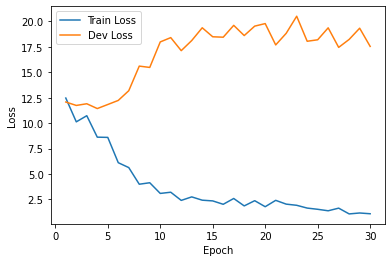

In [112]:
import matplotlib.pyplot as plt

t = list(range(1, 31))
plt.plot(t, train_losses, label="Train Loss")
plt.plot(t, dev_losses, label="Dev Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Inference

In [114]:
model = BertForQuestionAnswering.from_pretrained('dump/model.30')
model.eval()

BertForQuestionAnswering(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(545, 256, padding_idx=0)
      (position_embeddings): Embedding(1024, 256)
      (token_type_embeddings): Embedding(2, 256)
      (LayerNorm): LayerNorm((256,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=True)
              (key): Linear(in_features=256, out_features=256, bias=True)
              (value): Linear(in_features=256, out_features=256, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=256, out_features=256, bias=True)
              (LayerNorm): LayerNorm((256,), eps=1e-12, elementwise_a

In [ ]:
for idx, sample in zip(range(1, 4), indexed_train_dataset):
    print(f'------{idx}------')
    print('Context:', sample['context'])
    print('Question:', sample['question'])
    
    input_ids, token_type_ids = [
        torch.tensor(sample[key], dtype=torch.long, device="cuda")
        for key in ("input_ids", "token_type_ids")
    ]
    
    with torch.no_grad():
        start_logits, end_logits = model(input_ids=input_ids[None, :], token_type_ids=token_type_ids[None, :])
    start_logits.squeeze_(0), end_logits.squeeze_(0)
    
    start_prob = start_logits[token_type_ids.bool()][1:-1].softmax(-1)
    end_prob = end_logits[token_type_ids.bool()][1:-1].softmax(-1)
    probability = torch.triu(start_prob[:, None] @ end_prob[None, :])
    index = torch.argmax(probability).item()
    
    start = index // len(end_prob)
    end = index % len(end_prob)
    
    start = sample['position'][start][0]
    end = sample['position'][end][1]

    print('Answer:', sample['context'][start:end])

In [ ]:
test_dataset = TokenizedKoMRC.load('/kaggle/input/k-digital-goorm-5-korean-mrc/test.json')
test_dataset = IndexerWrappedDataset(test_dataset, indexer)
print("Number of Test Samples", len(test_dataset))
print(test_dataset[0])

In [ ]:
import csv

os.makedirs('out', exist_ok=True)
with torch.no_grad(), open('out/baseline.csv', 'w') as fd:
    writer = csv.writer(fd)
    writer.writerow(['Id', 'Predicted'])

    rows = []
    for sample in tqdm(test_dataset, "Testing"):
        input_ids, token_type_ids = [
            torch.tensor(sample[key], dtype=torch.long, device="cuda")
            for key in ("input_ids", "token_type_ids")
        ]
    
        with torch.no_grad():
            start_logits, end_logits = model(input_ids=input_ids[None, :], token_type_ids=token_type_ids[None, :])
        start_logits.squeeze_(0), end_logits.squeeze_(0)
    
        start_prob = start_logits[token_type_ids.bool()][1:-1].softmax(-1)
        end_prob = end_logits[token_type_ids.bool()][1:-1].softmax(-1)
        probability = torch.triu(start_prob[:, None] @ end_prob[None, :])
        index = torch.argmax(probability).item()
    
        start = index // len(end_prob)
        end = index % len(end_prob)
    
        start = sample['position'][start][0]
        end = sample['position'][end][1]

        rows.append([sample["guid"], sample['context'][start:end]])
    
    writer.writerows(rows)